<h2><center><h1><center><font color='Red'> Surprise<font color='Green'> Housing <font color='Blue'> Australian <font color='Red'>Market <font color='Green'> Assignement 

<h4><center> By <br><br>
Farooq Ahmed,MSc IBF(Liverpool JMU), MBA (City London), EPAT <br>
email <font color='Blue'>Farooqams@hotmail.com<font color='Blue'>

<h2><center> Nov 2021<br><br>

# Objective of the Assignment Part-I 


### The assignement required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
### The company management want to understand Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house.Also, determine the optimal value of lambda for ridge and lasso regression.

### The assignement will requires to develop multi regression.  

### We will approach the problem by  assessing the significant drivers and identifying the problem by Pythonic way, reducing duplcating task. Where possible / applicable. 


# Import Library

We import following libraries 

In [1]:
%%time

# Basic Libraries
import warnings
warnings.filterwarnings('ignore')
import datetime ## download to convert loan formating
import numpy as np 
import pandas as pd
import seaborn as sns ## download for using rich sea-born theme 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from IPython.display import display, HTML

# Processing Libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model Libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from scipy.stats import norm

# Model Optimizing & Scoring and Feature Selection Libraries 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Visual Parameters
sns.set_style('white') 
sns.color_palette("rocket", as_cmap=True)
sns.light_palette("green", as_cmap=True)
plt.rcParams['font.family'] = 'serif'
plt.style.use('seaborn-bright')
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 30)
pd.options.display.float_format = "{:,.2f}".format ## This libary parameter is downloaded keep the loan in Notional Decimal.

# System Library 
import os

# Processing Benchmarking Library
from tqdm import tqdm
from tqdm.notebook import trange, tqdm

Wall time: 2.48 s


## Download  and Cleaning Data


We download the Train.csv data

In [2]:
df= pd.read_csv('train.csv',encoding = "ISO-8859-1",parse_dates=True)

We check how many columns are there in the raw data.

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We also check how the raw data and analysed. And, decides which items we need to maniplate by dummpy variables or by scaling. 

In [4]:
display(df.head(10))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.00,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,"1,993.00",Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.00,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,...,1,Gd,Attchd,"2,004.00",RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,...,2,TA,Attchd,"1,973.00",RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.00,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,...,2,TA,Detchd,"1,931.00",Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.00,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,...,2,TA,Attchd,"1,939.00",RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

The current data shape is 1460 x 81 rows

In [6]:
df.shape

(1460, 81)

The decribe data help use to understand the minimum and maximum

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,379.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,56.90,70.05,"10,516.83",6.10,5.58,"1,971.27","1,984.87",103.69,443.64,46.55,567.24,"1,057.43","1,162.63",346.99,5.84,"1,515.46",0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,"1,978.51",1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,42.30,24.28,"9,981.26",1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,20.00,21.00,"1,300.00",1.00,1.00,"1,872.00","1,950.00",0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,"1,900.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,20.00,59.00,"7,553.50",5.00,5.00,"1,954.00","1,967.00",0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,"1,129.50",0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,"1,961.00",1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,50.00,69.00,"9,478.50",6.00,5.00,"1,973.00","1,994.00",0.00,383.50,0.00,477.50,991.50,"1,087.00",0.00,0.00,"1,464.00",0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,"1,980.00",2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",70.00,80.00,"11,601.50",7.00,6.00,"2,000.00","2,004.00",166.00,712.25,0.00,808.00,"1,298.25","1,391.25",728.00,0.00,"1,776.75",1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,"2,002.00",2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",190.00,313.00,"215,245.00",10.00,9.00,"2,010.00","2,010.00","1,600.00","5,644.00","1,474.00","2,336.00","6,110.00","4,692.00","2,065.00",572.00,"5,642.00",3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,"2,010.00",4.00,"1,418.00",857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


We check in the dataset characteristics and data dictonary

## Dataset characteristics


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

## Data Preparation from the above characteristics

we will drop the non required features and update the categories from characteristics by first checking which are BLANK

In [8]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
(df.isnull().sum() / df.count())

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.22
LotArea           0.00
Street            0.00
Alley            15.04
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.01
MasVnrArea        0.01
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.03
BsmtCond          0.03
BsmtExposure      0.03
BsmtFinType1      0.03
BsmtFinSF1        0.00
BsmtFinType2      0.03
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.00
1stFlrSF   

In [10]:
drop_list = ['Alley','LotFrontage','BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual',
             'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

df.drop(drop_list, axis = 1, inplace = True)

In [11]:
(df.isnull().sum() / df.count())

Id              0.00
MSSubClass      0.00
MSZoning        0.00
LotArea         0.00
Street          0.00
LotShape        0.00
LandContour     0.00
Utilities       0.00
LotConfig       0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
BldgType        0.00
HouseStyle      0.00
OverallQual     0.00
OverallCond     0.00
YearBuilt       0.00
YearRemodAdd    0.00
RoofStyle       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.01
MasVnrArea      0.01
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
BsmtFinSF1      0.00
BsmtFinSF2      0.00
BsmtUnfSF       0.00
TotalBsmtSF     0.00
Heating         0.00
HeatingQC       0.00
CentralAir      0.00
Electrical      0.00
1stFlrSF        0.00
2ndFlrSF        0.00
LowQualFinSF    0.00
GrLivArea       0.00
BsmtFullBath    0.00
BsmtHalfBath    0.00
FullBath        0.00
HalfBath        0.00
BedroomAbvGr    0.00
KitchenAbvGr    0.00
KitchenQual     0.00
TotRmsAbvGrd 

In [12]:
# 
df.MSZoning.replace({'A':"Agriculture", 'C':"Commercial", 'FV':"Floating Village Residential", 'I':"Industrial", 'RH':"Residential High Density", 'RL':"Residential Low Density",'RP':"Residential Low Density Park",'RM':"Residential Medium Density"},inplace = True)

In [13]:
df.MSZoning

0       Residential Low Density
1       Residential Low Density
2       Residential Low Density
3       Residential Low Density
4       Residential Low Density
                 ...           
1455    Residential Low Density
1456    Residential Low Density
1457    Residential Low Density
1458    Residential Low Density
1459    Residential Low Density
Name: MSZoning, Length: 1460, dtype: object

In [14]:
df['DiffYearBuilt'] = pd.datetime.now().year - df['YearBuilt']
df['DiffYearRemodAdd'] = pd.datetime.now().year - df['YearRemodAdd']


We re-check the data , after updating the custom features

In [15]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DiffYearBuilt,DiffYearRemodAdd
0,1,60,Residential Low Density,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,...,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,18,18
1,2,20,Residential Low Density,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,...,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,45,45
2,3,60,Residential Low Density,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,...,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,20,19
3,4,70,Residential Low Density,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,...,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,106,51
4,5,60,Residential Low Density,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,...,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,21,21


## EDA Univariate Analysis

we decided to run the EDA analysis to understand the data

  0%|          | 0/66 [00:00<?, ?it/s]

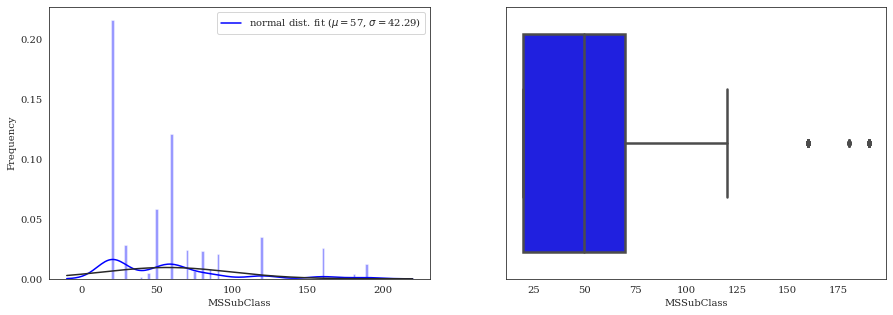

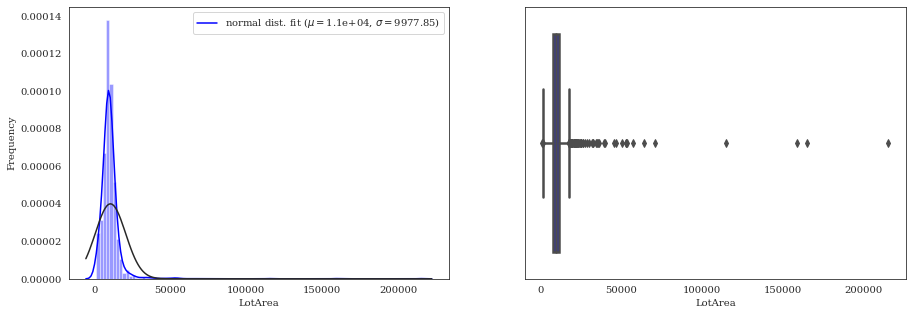

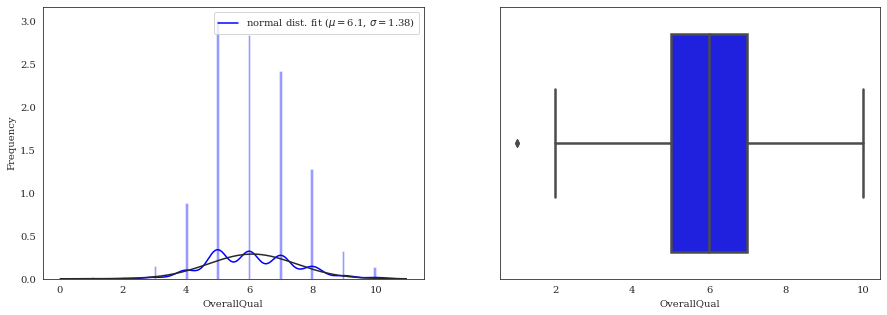

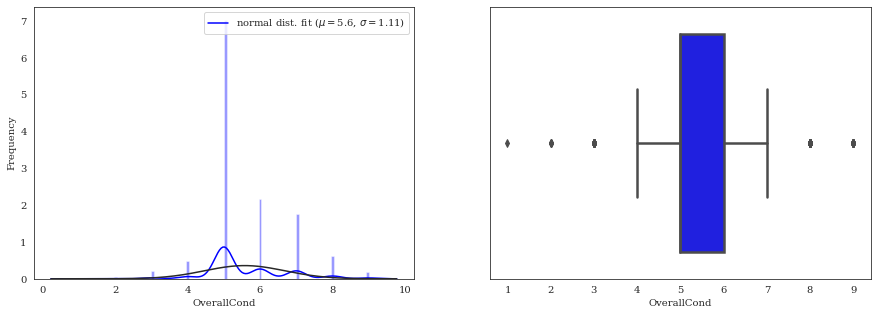

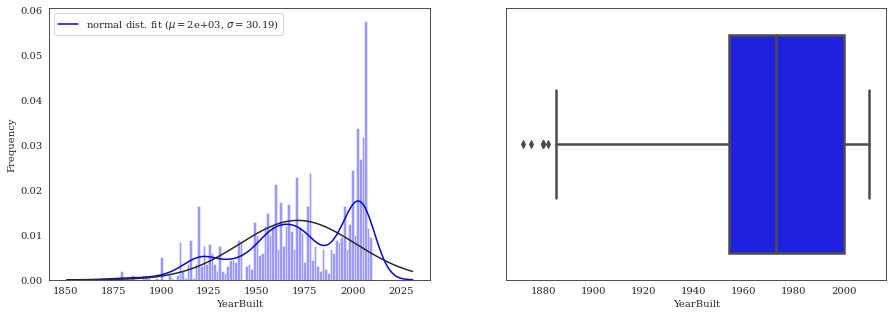

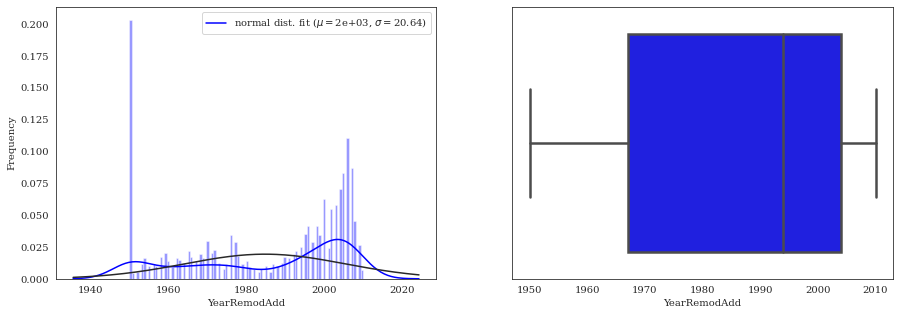

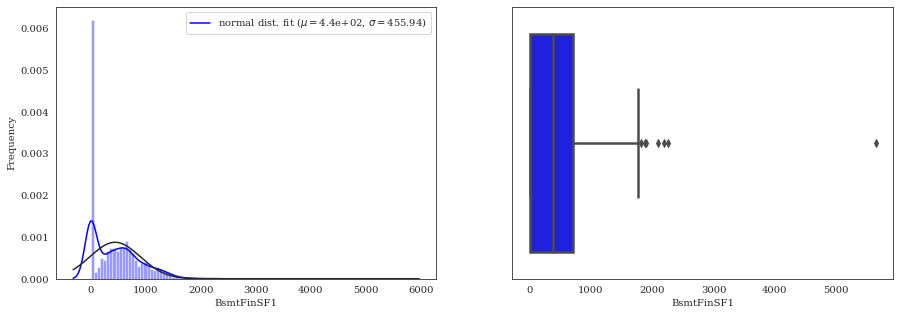

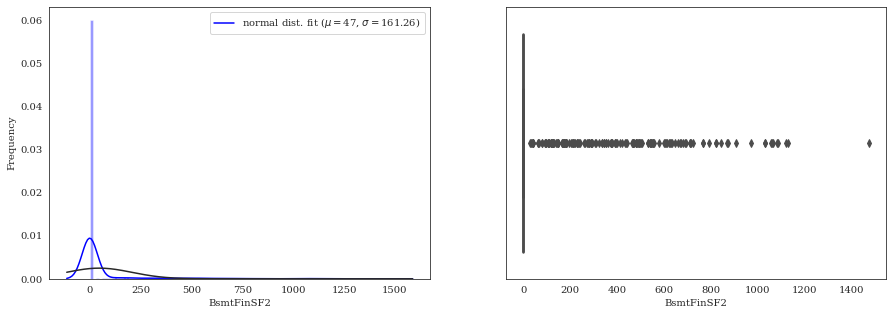

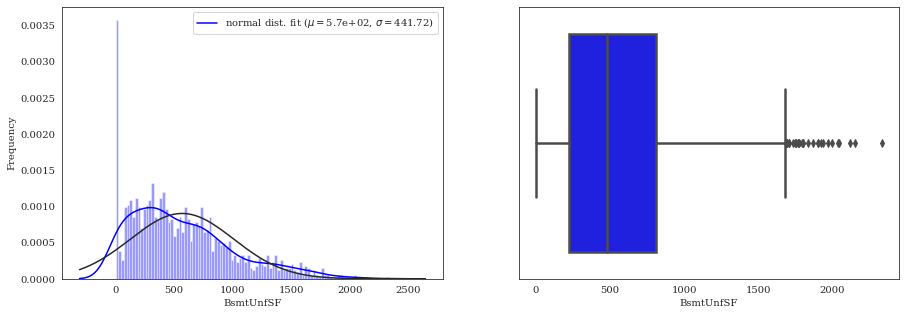

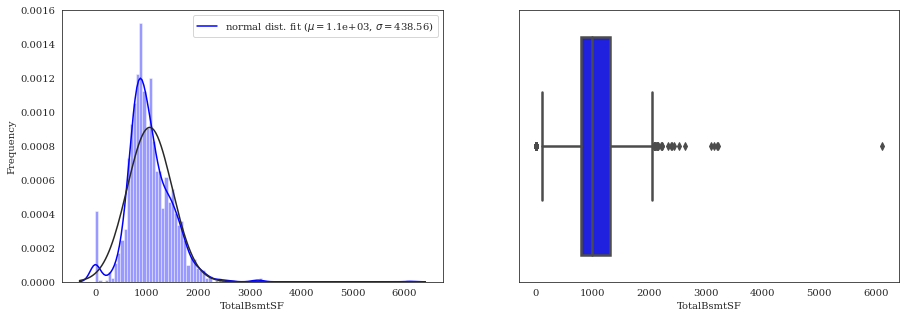

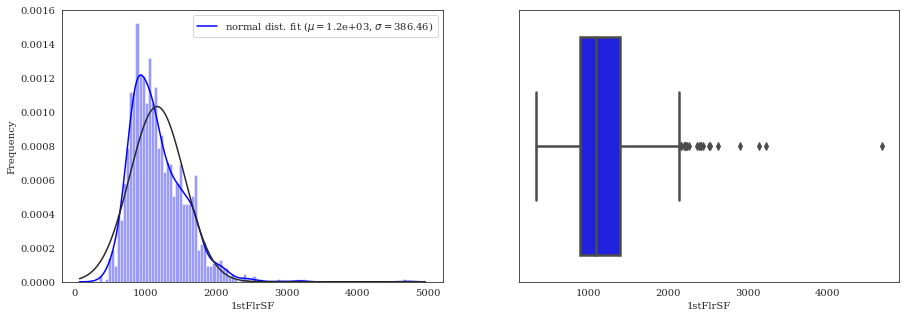

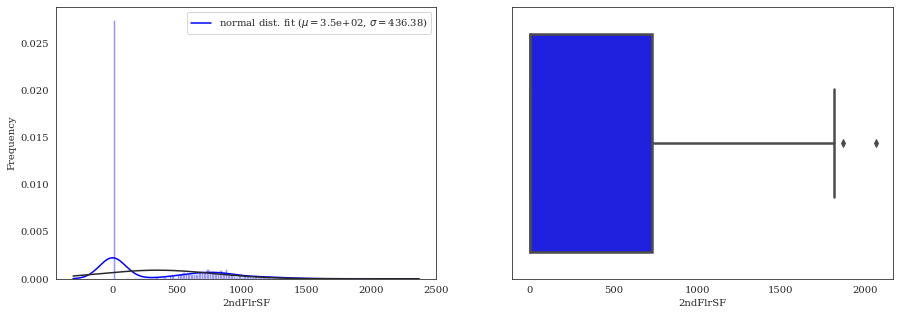

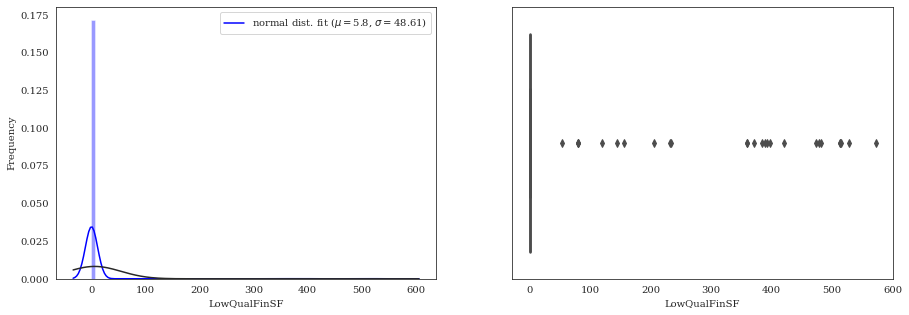

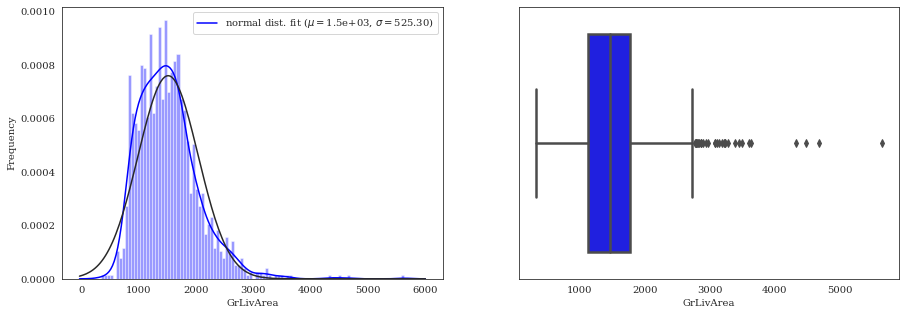

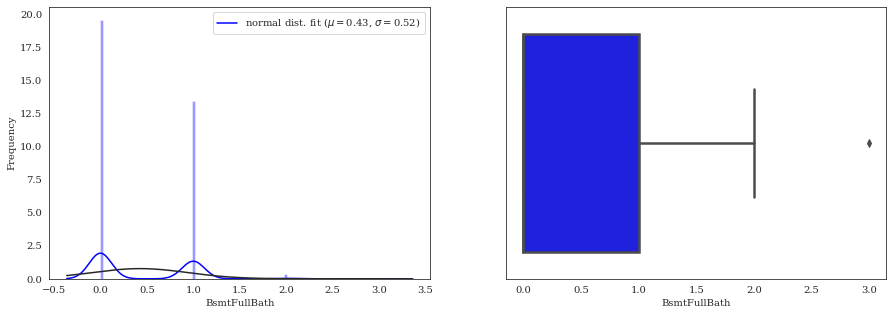

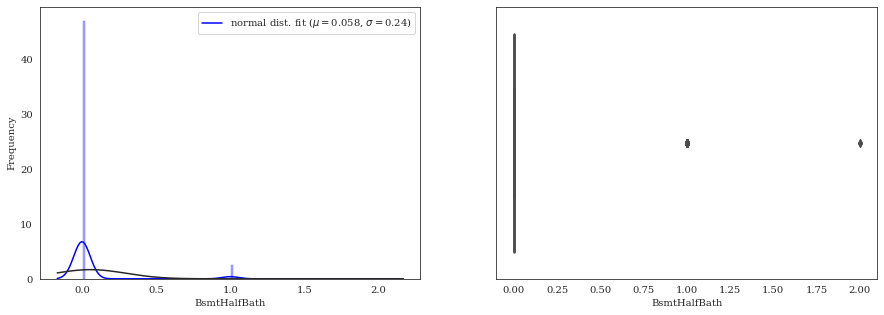

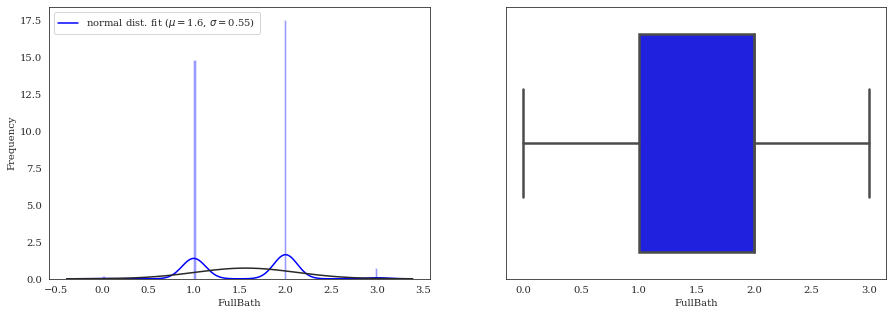

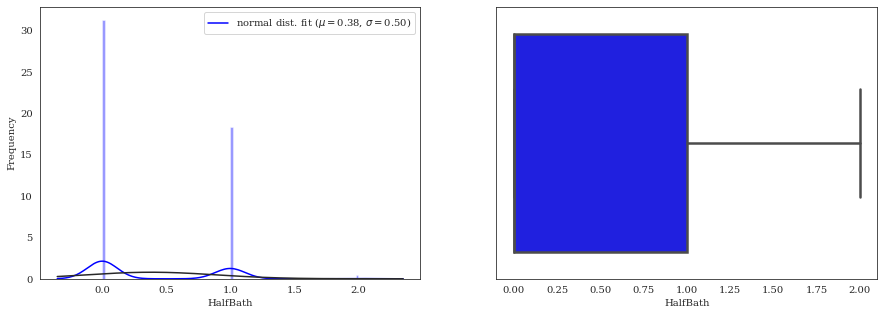

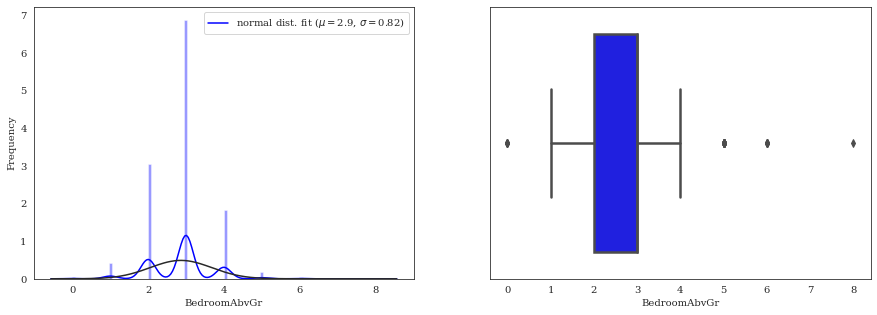

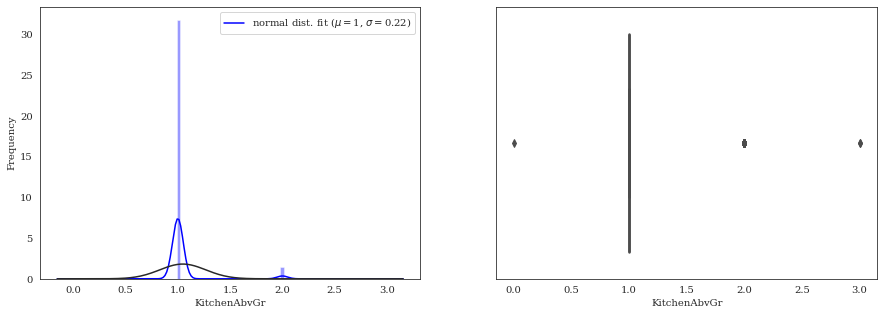

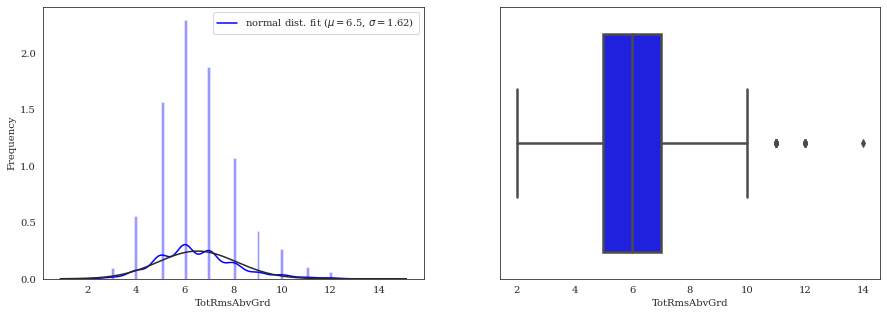

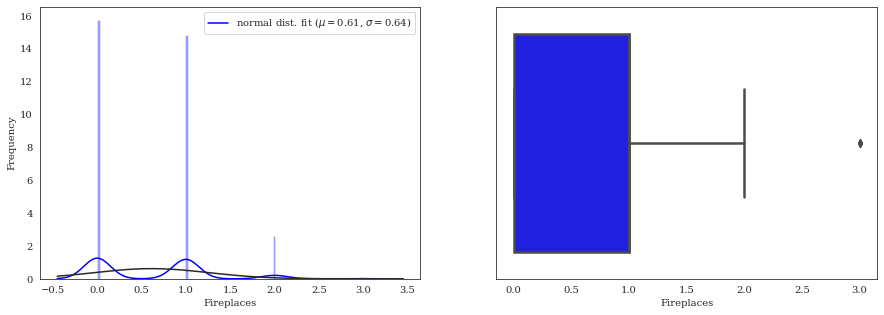

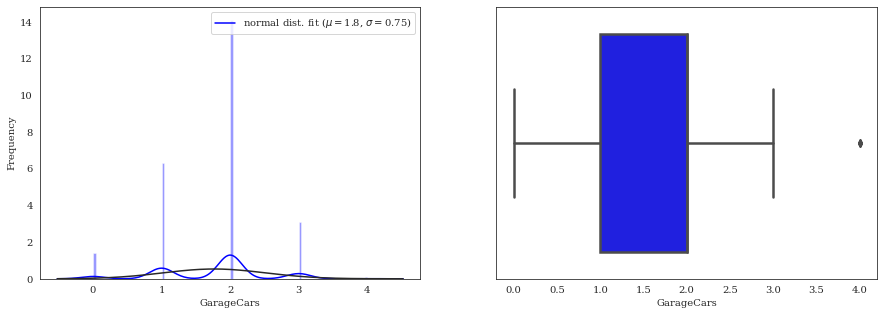

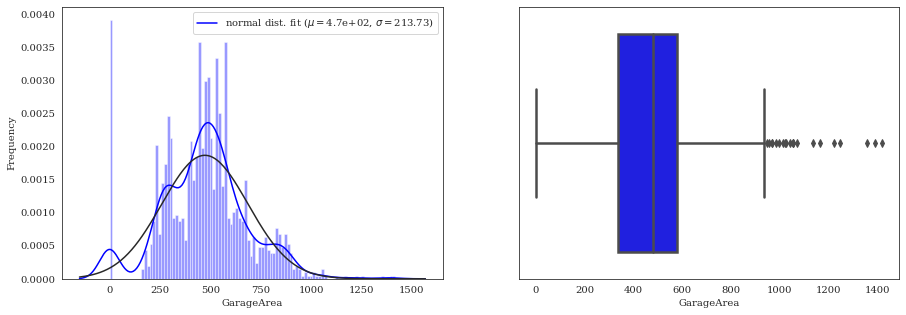

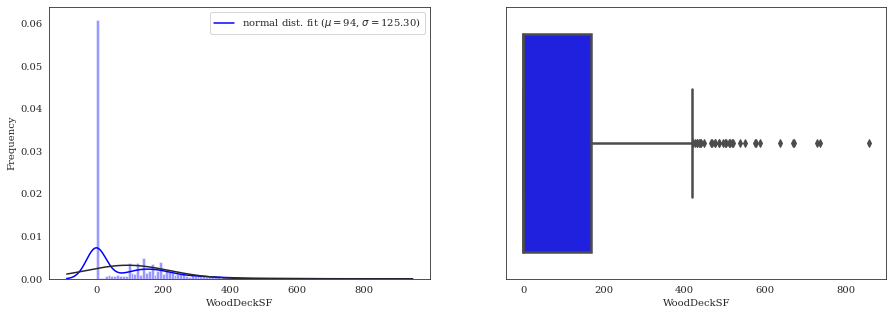

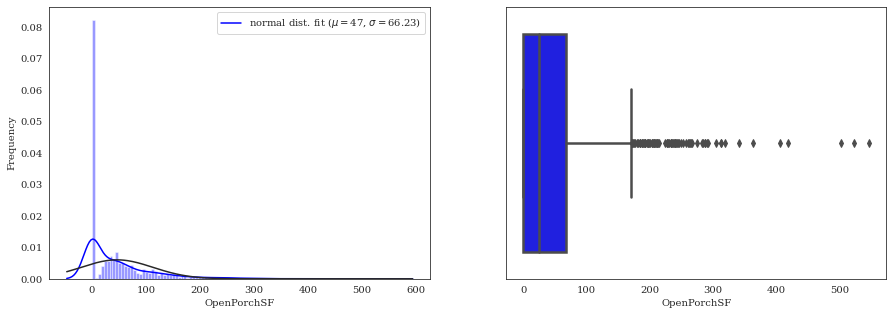

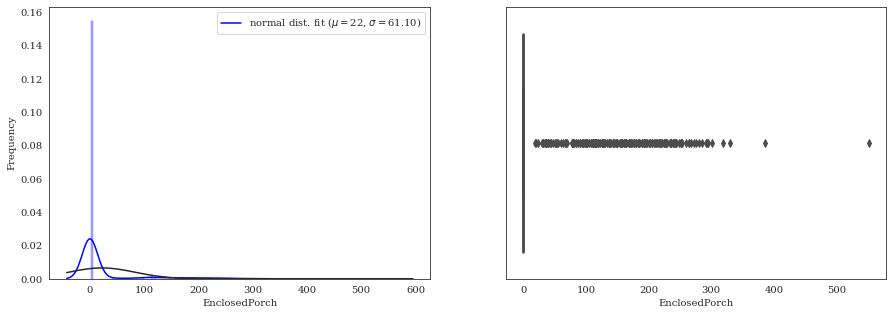

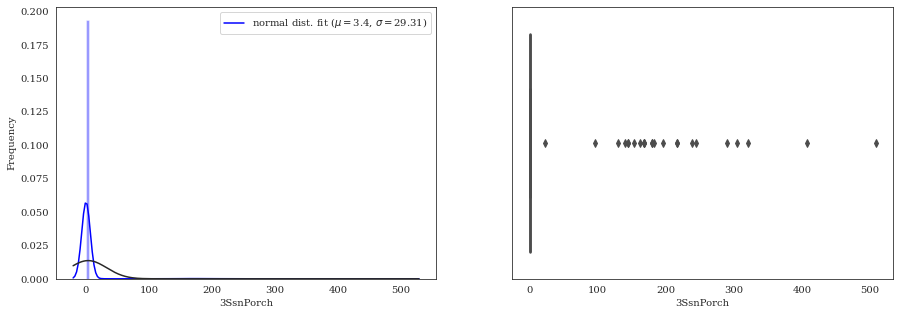

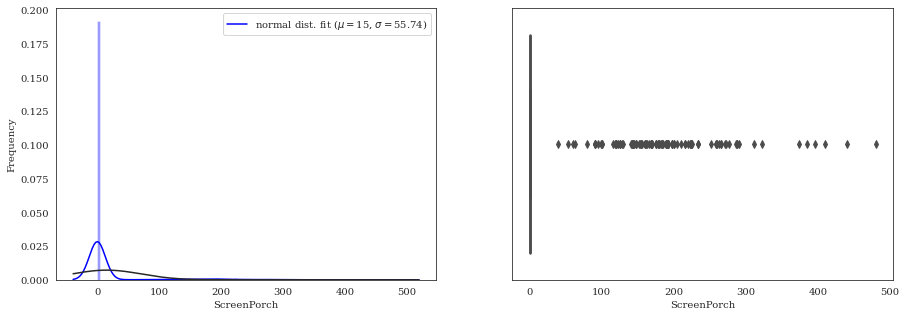

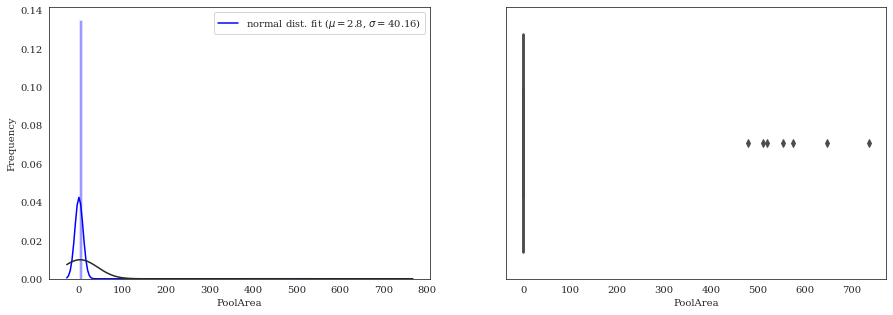

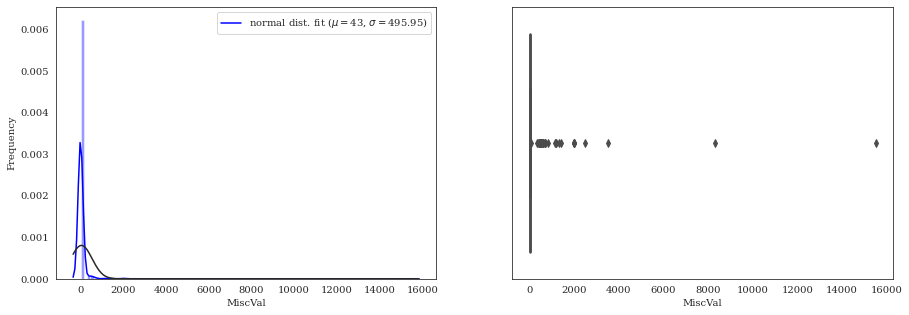

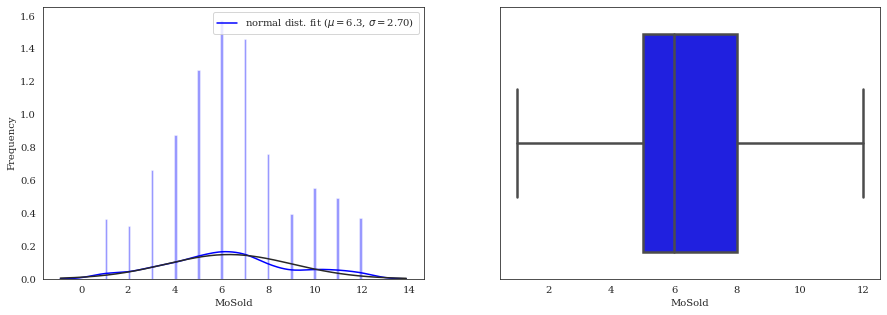

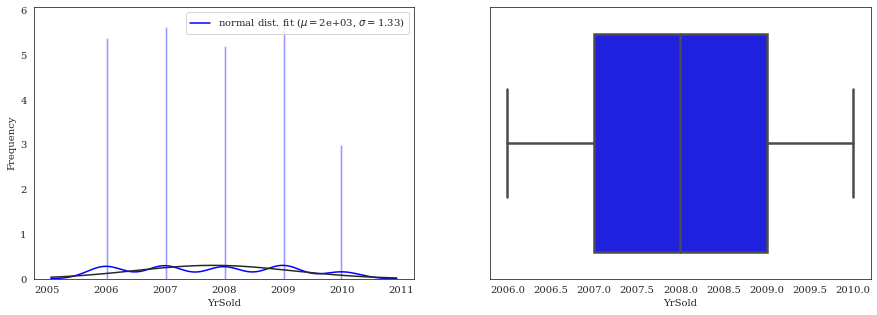

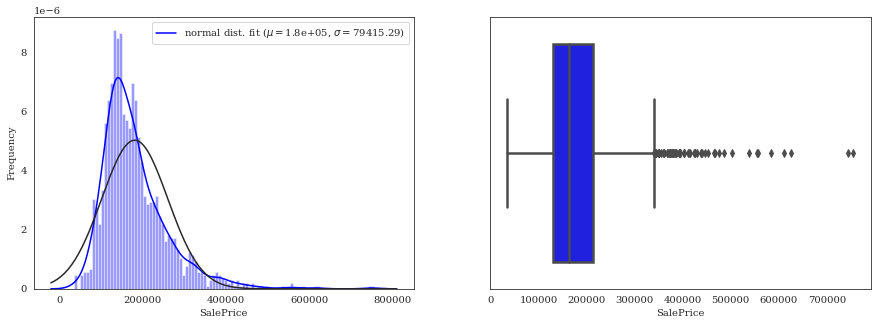

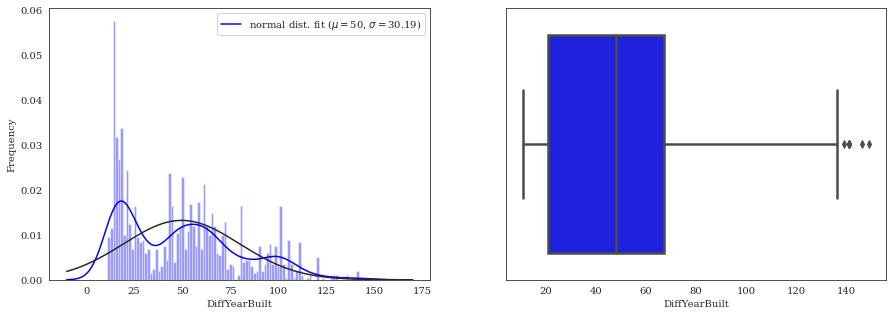

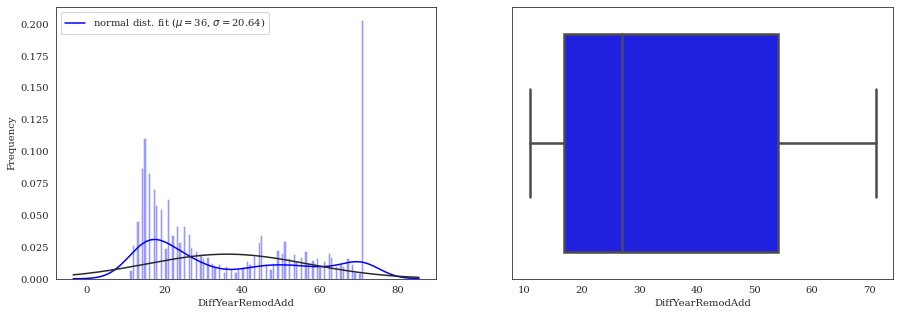

In [16]:
var = df.columns[1:]
for i in tqdm(var):
    plt.figure(figsize=(15,5))
    try:
        plt.subplot(1,2,1)
        sns.distplot(a=df[i], bins=100,kde=True,color='blue', fit=norm)
        (mu, sigma) = norm.fit(df[i])
        plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
        plt.ylabel('Frequency')
        plt.subplot(1,2,2)
        sns.boxplot(x=df[i],color='blue',linewidth=2.5)
       
    except Exception:
        plt.close()
        pass 

plt.show()

we noted the result of distribution for 'Sales' follow normal distribution. 

  0%|          | 0/66 [00:00<?, ?it/s]

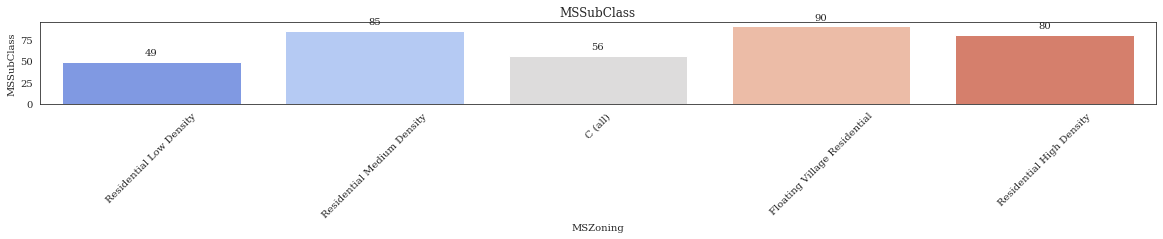

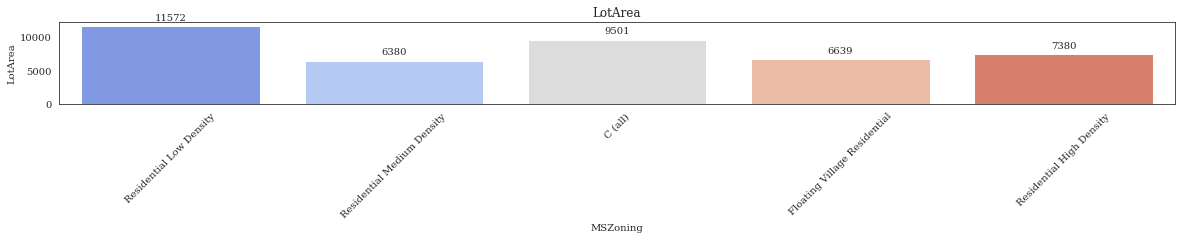

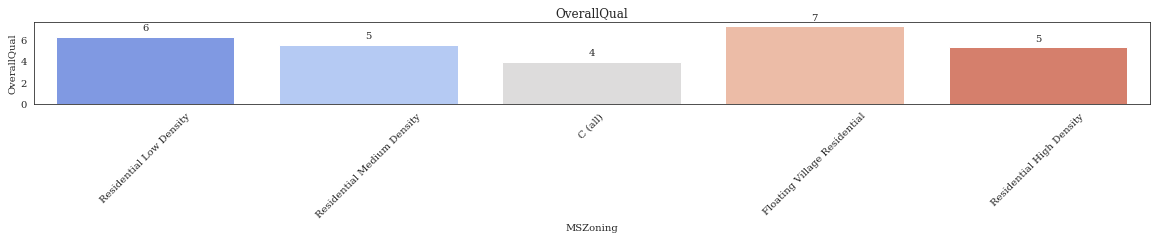

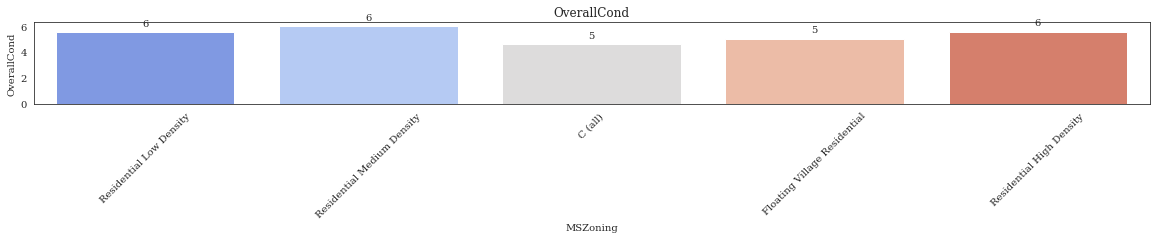

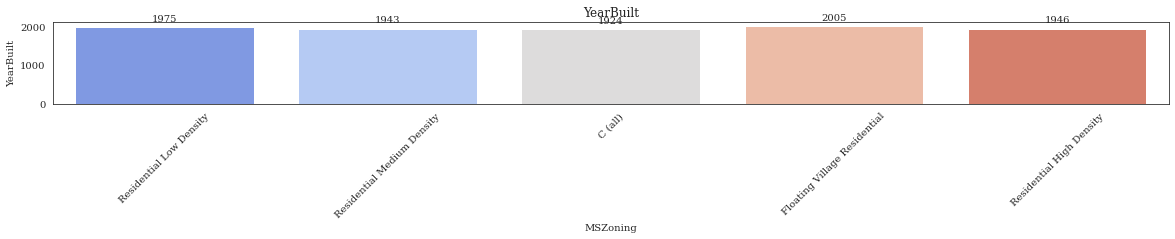

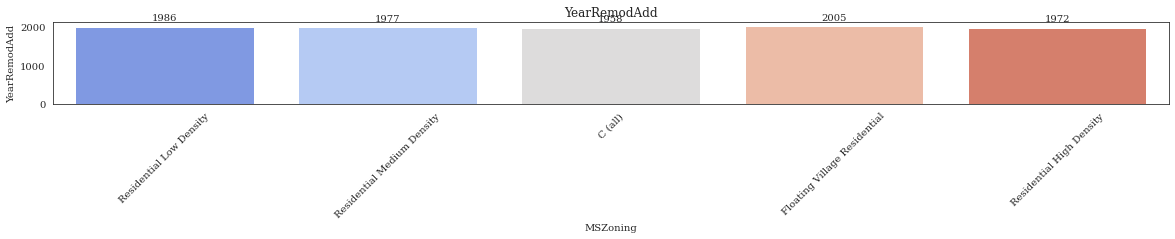

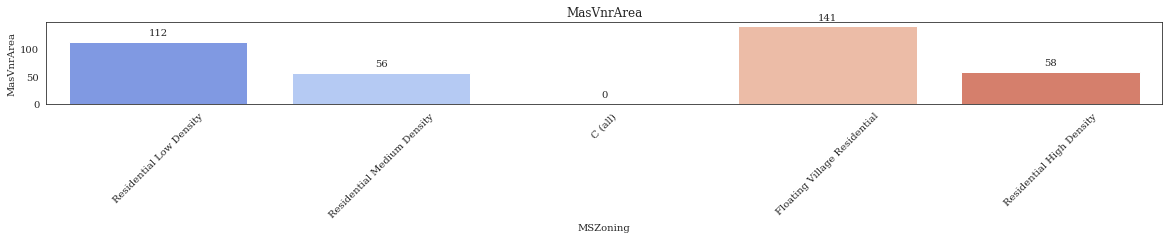

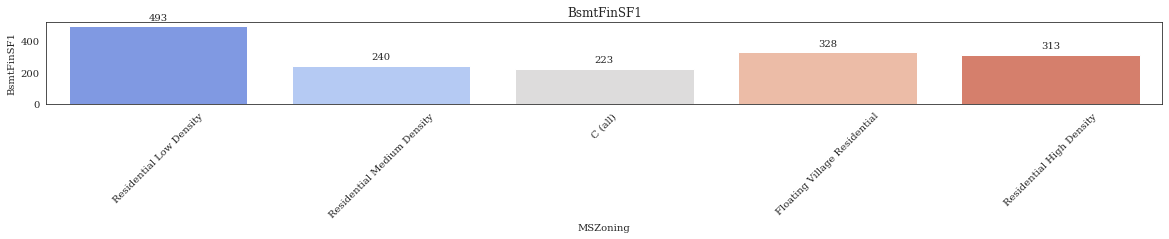

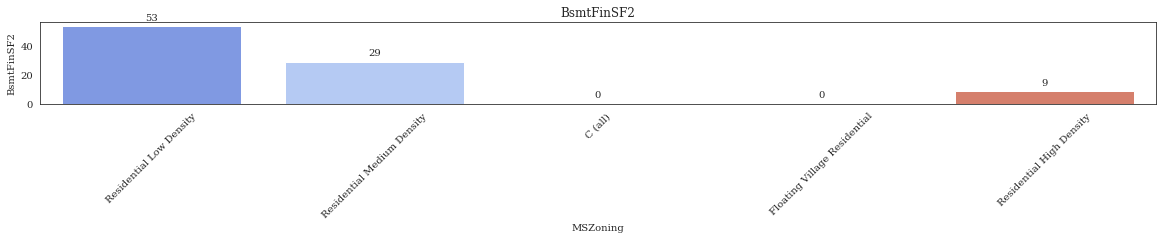

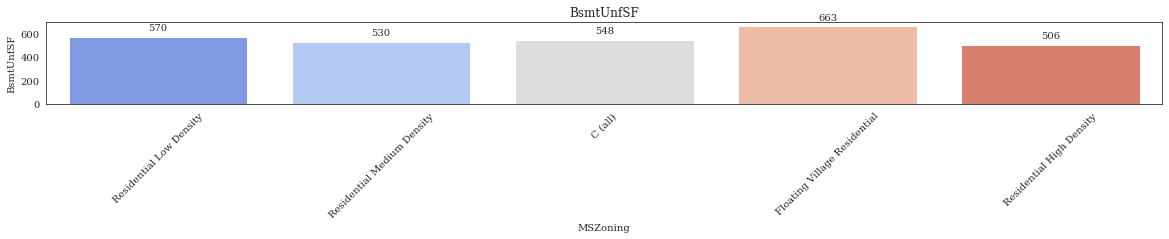

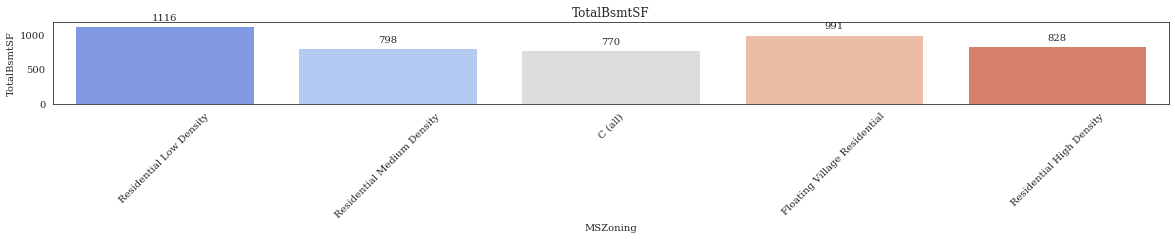

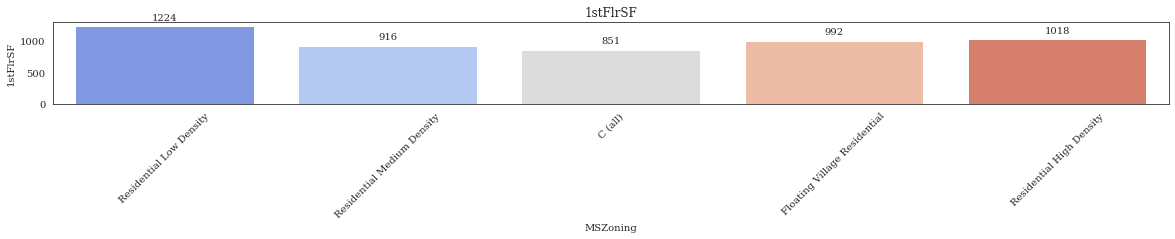

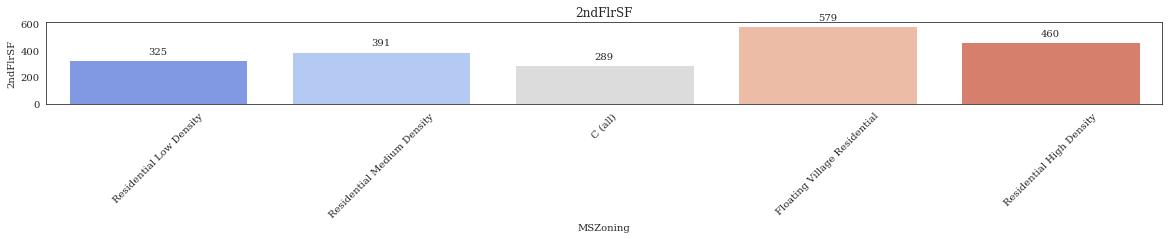

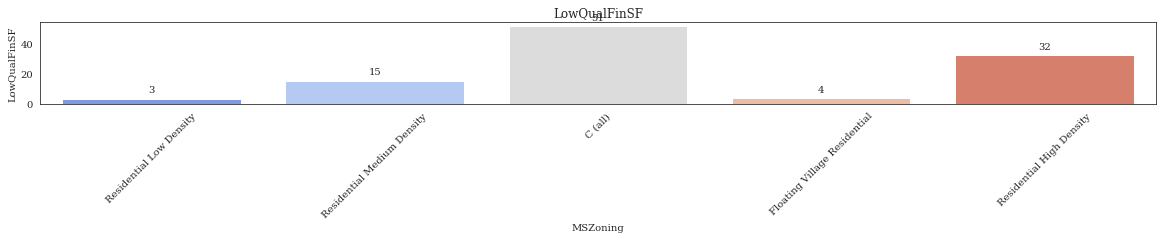

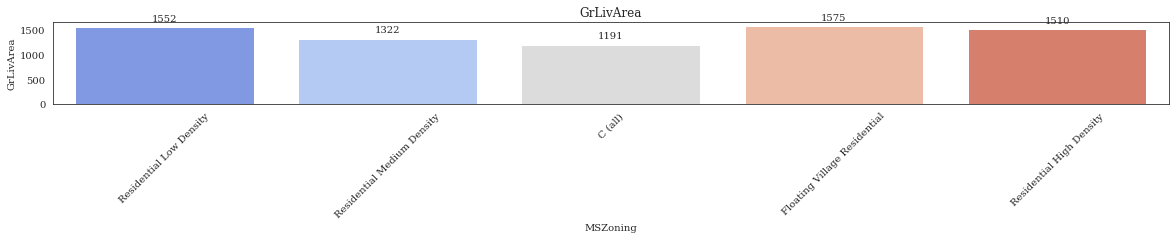

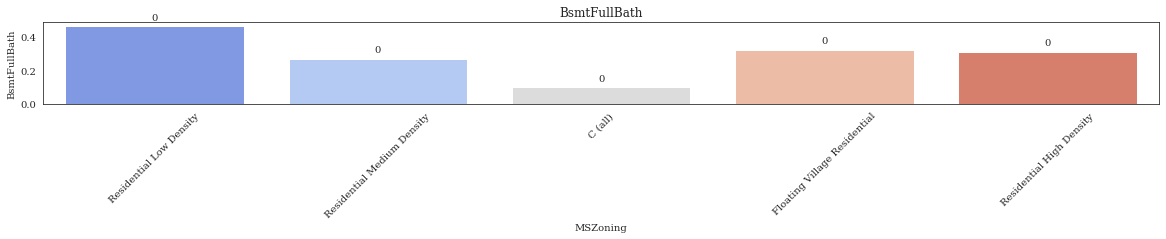

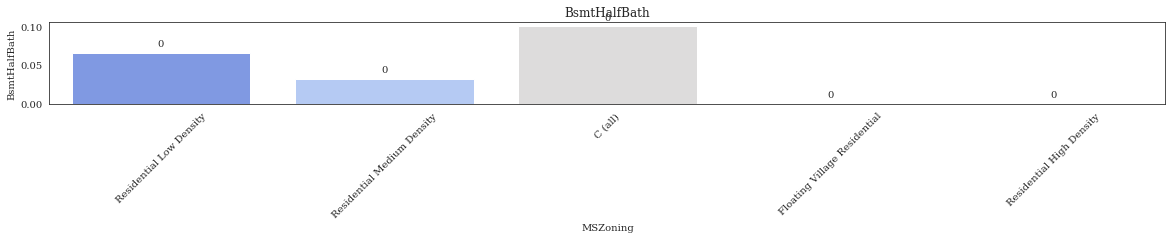

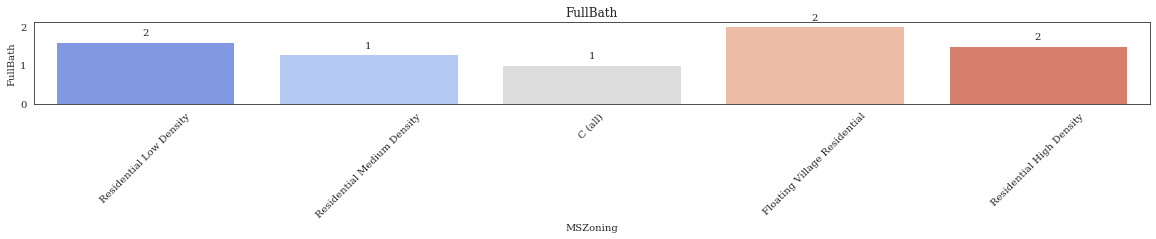

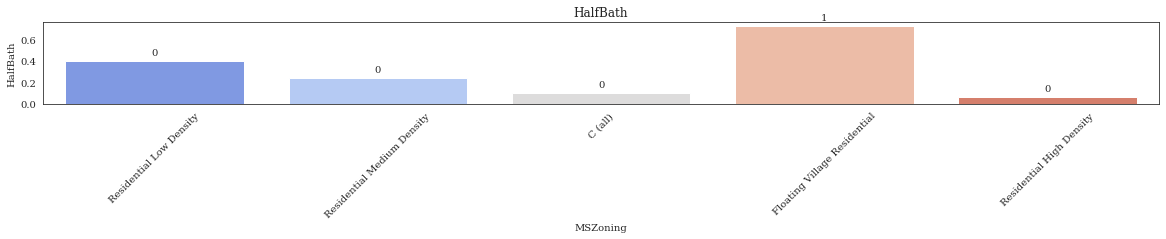

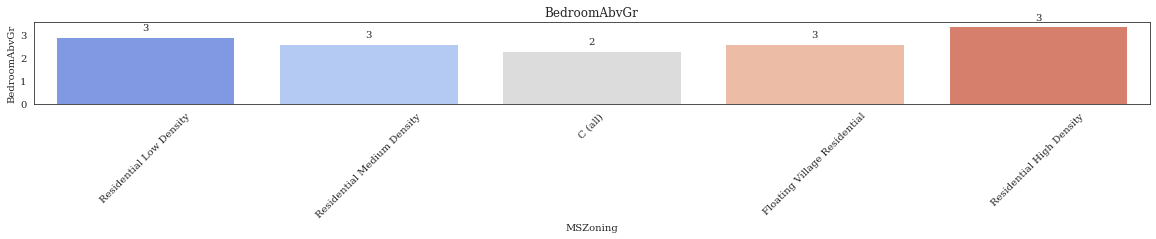

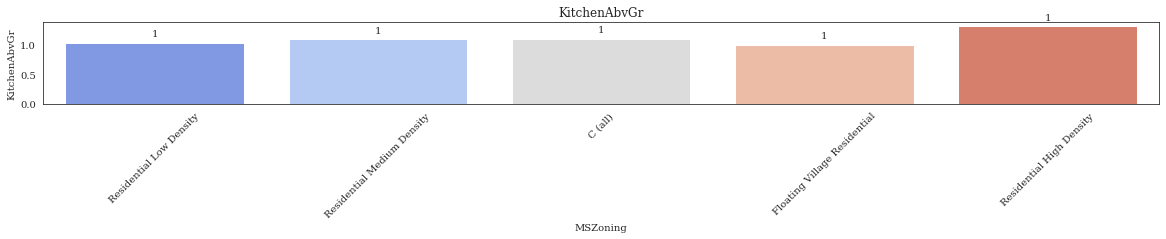

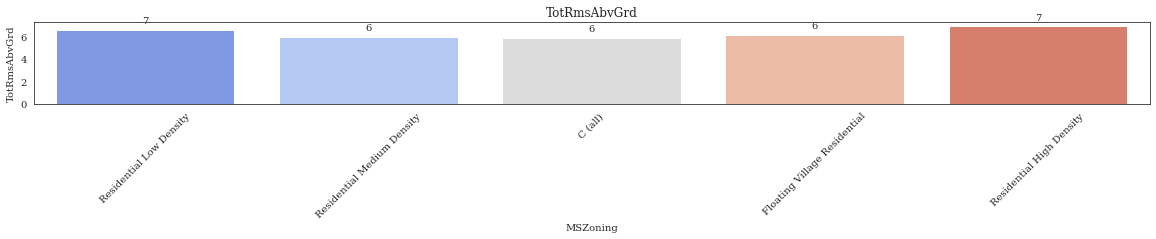

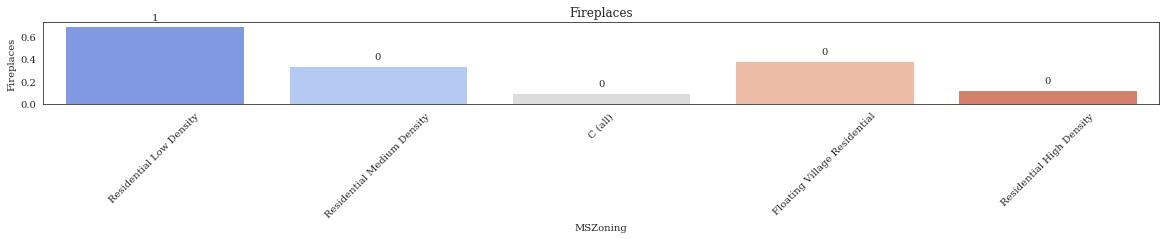

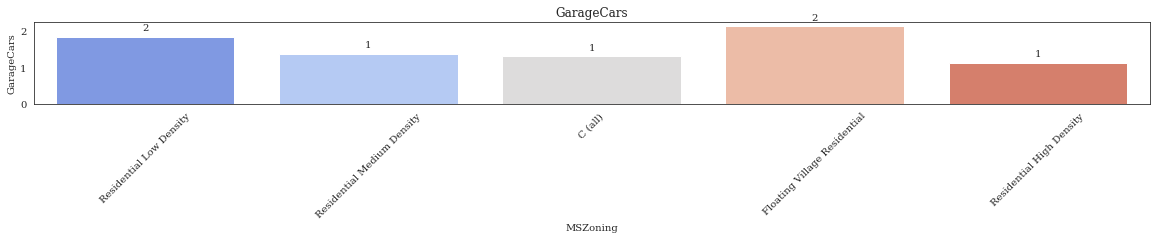

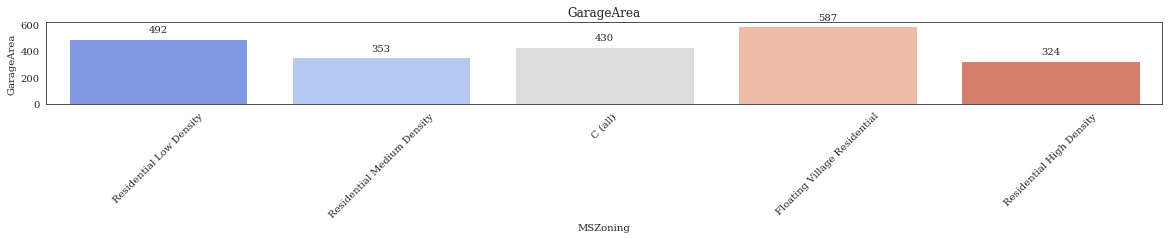

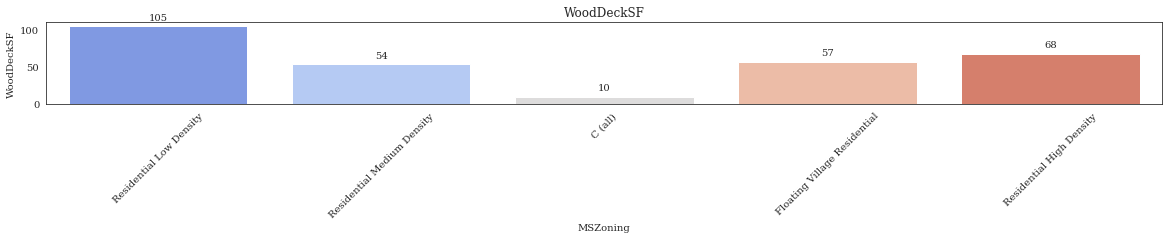

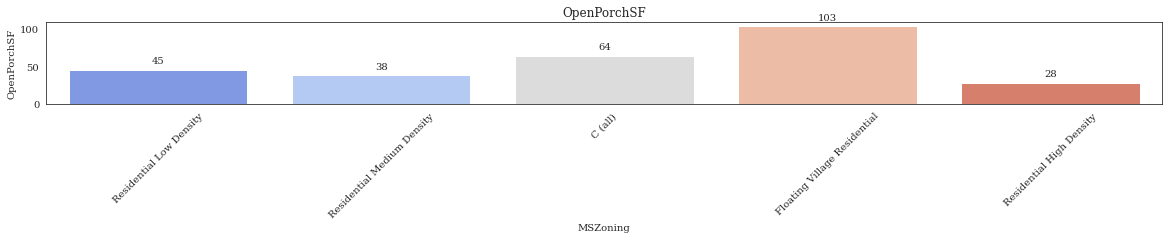

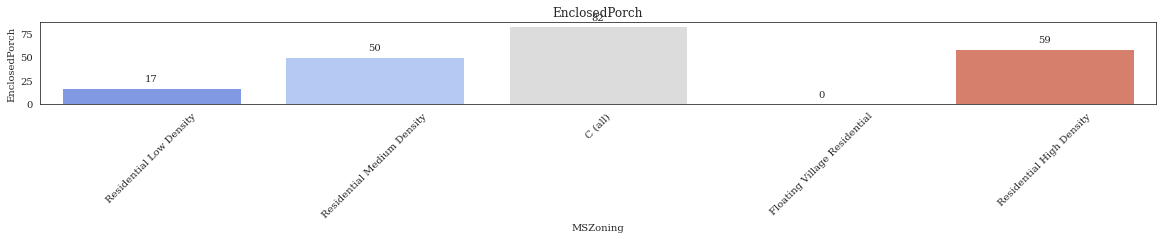

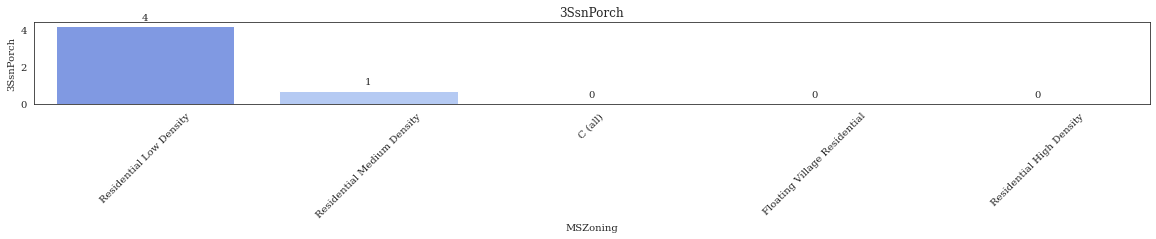

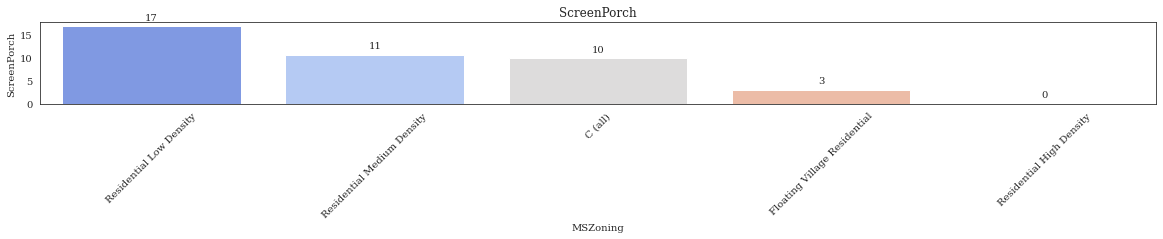

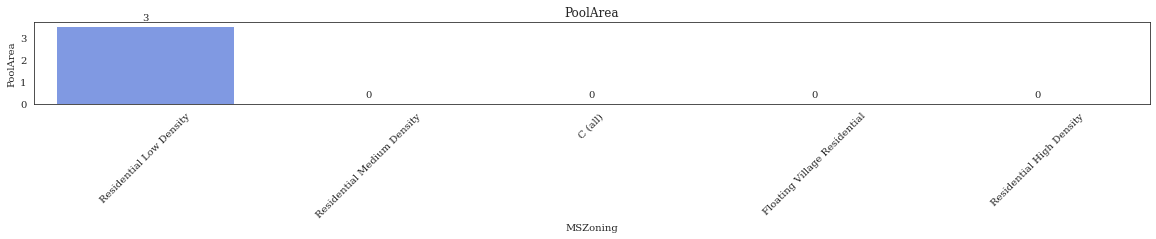

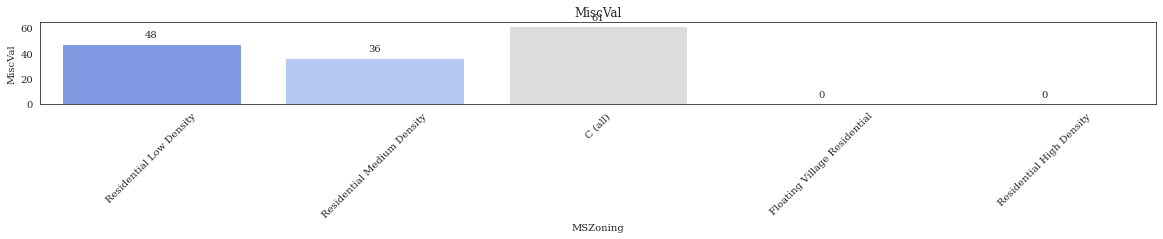

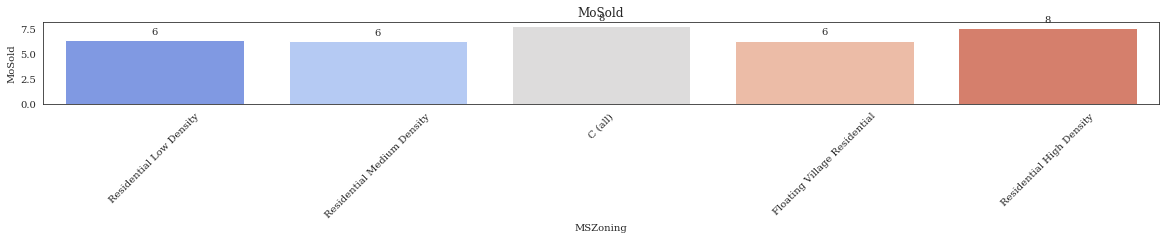

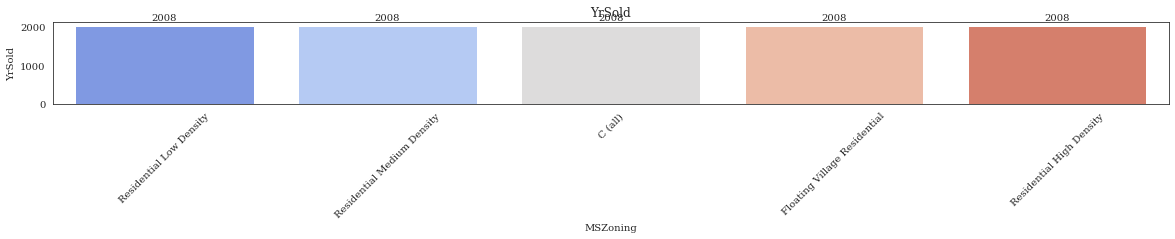

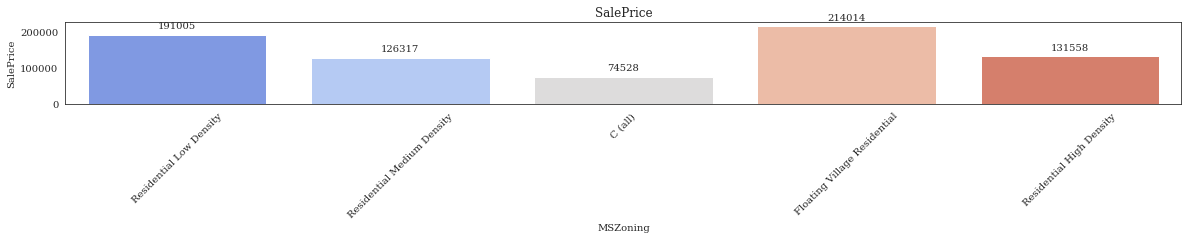

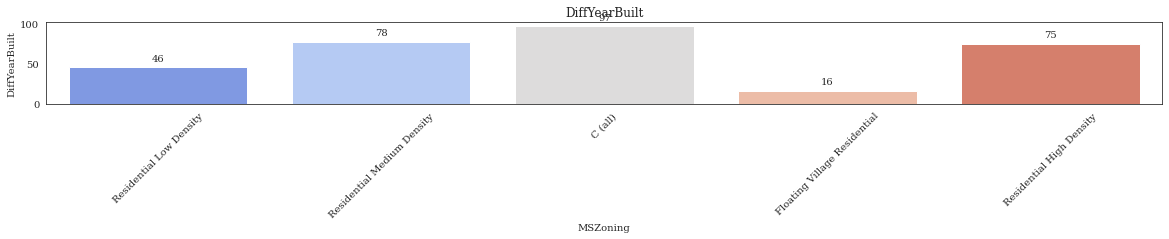

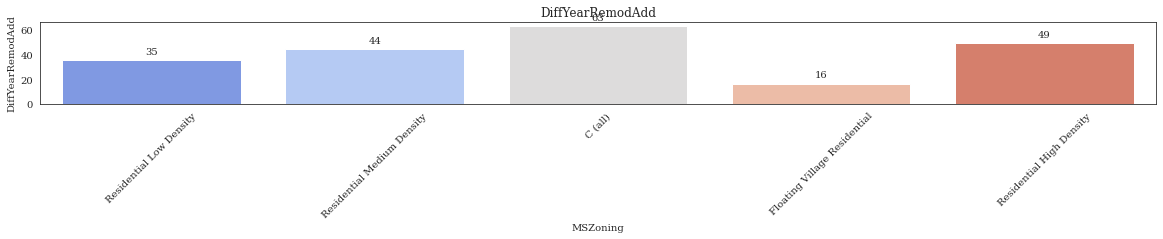

In [17]:
var = df.columns[1:]
for i in tqdm(var):
    plt.figure(figsize=(20,1.5))
    try:
        splot = sns.barplot(x='MSZoning', y=i,  data=df,  ci=None,  capsize=.2, palette='coolwarm')
        plt.title(str(i))
        
        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        plt.xticks(rotation=45)
       
    except Exception:
        plt.close()
        pass 

plt.show()

## Bivariate analysis by Correlation

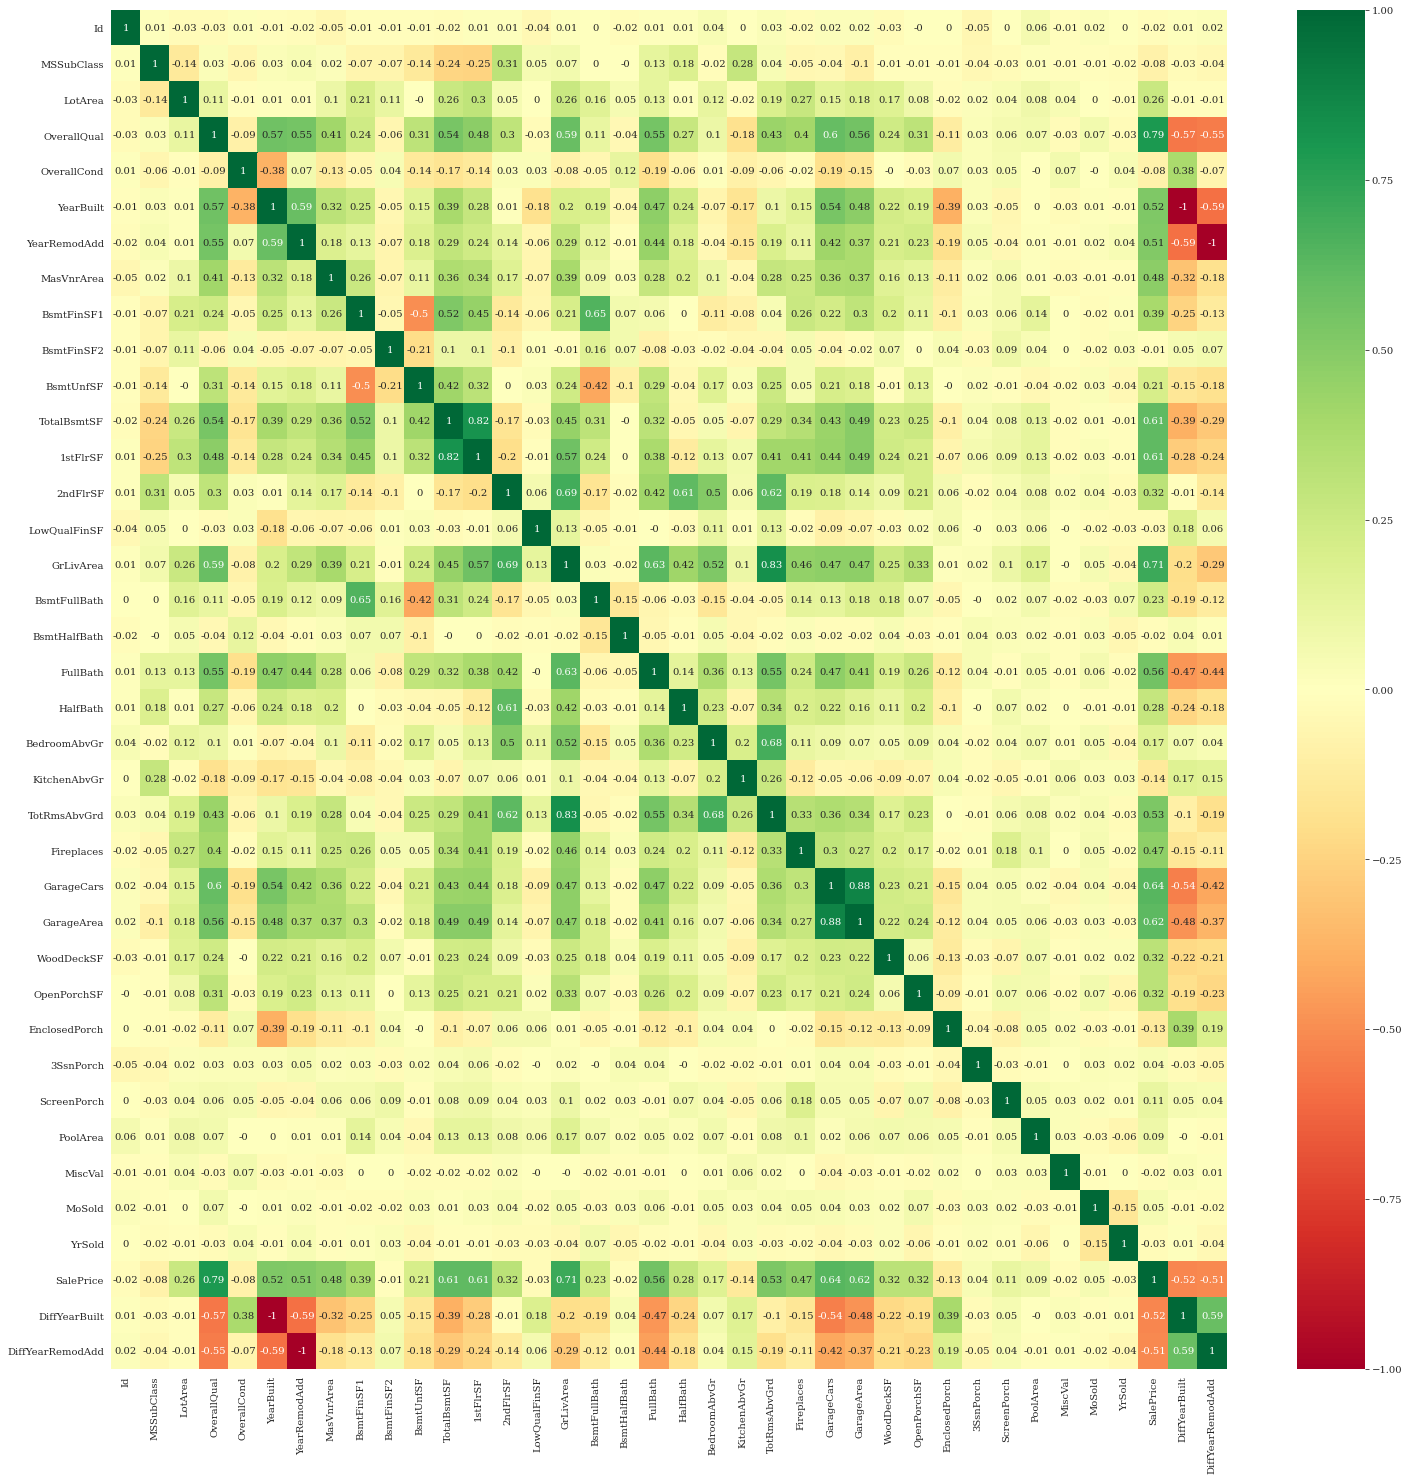

In [18]:
corr_df = df
cor = corr_df.corr().round(2)
plt.figure(figsize=(25,25))
sns.heatmap(cor, cmap="RdYlGn", annot=True)
plt.savefig('correlation.jpeg')
plt.show()

## Check Error 

In [19]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbv

we also check if there is any blank data , which requires to be drop or impute

## Pair Plots to check the linear relationship

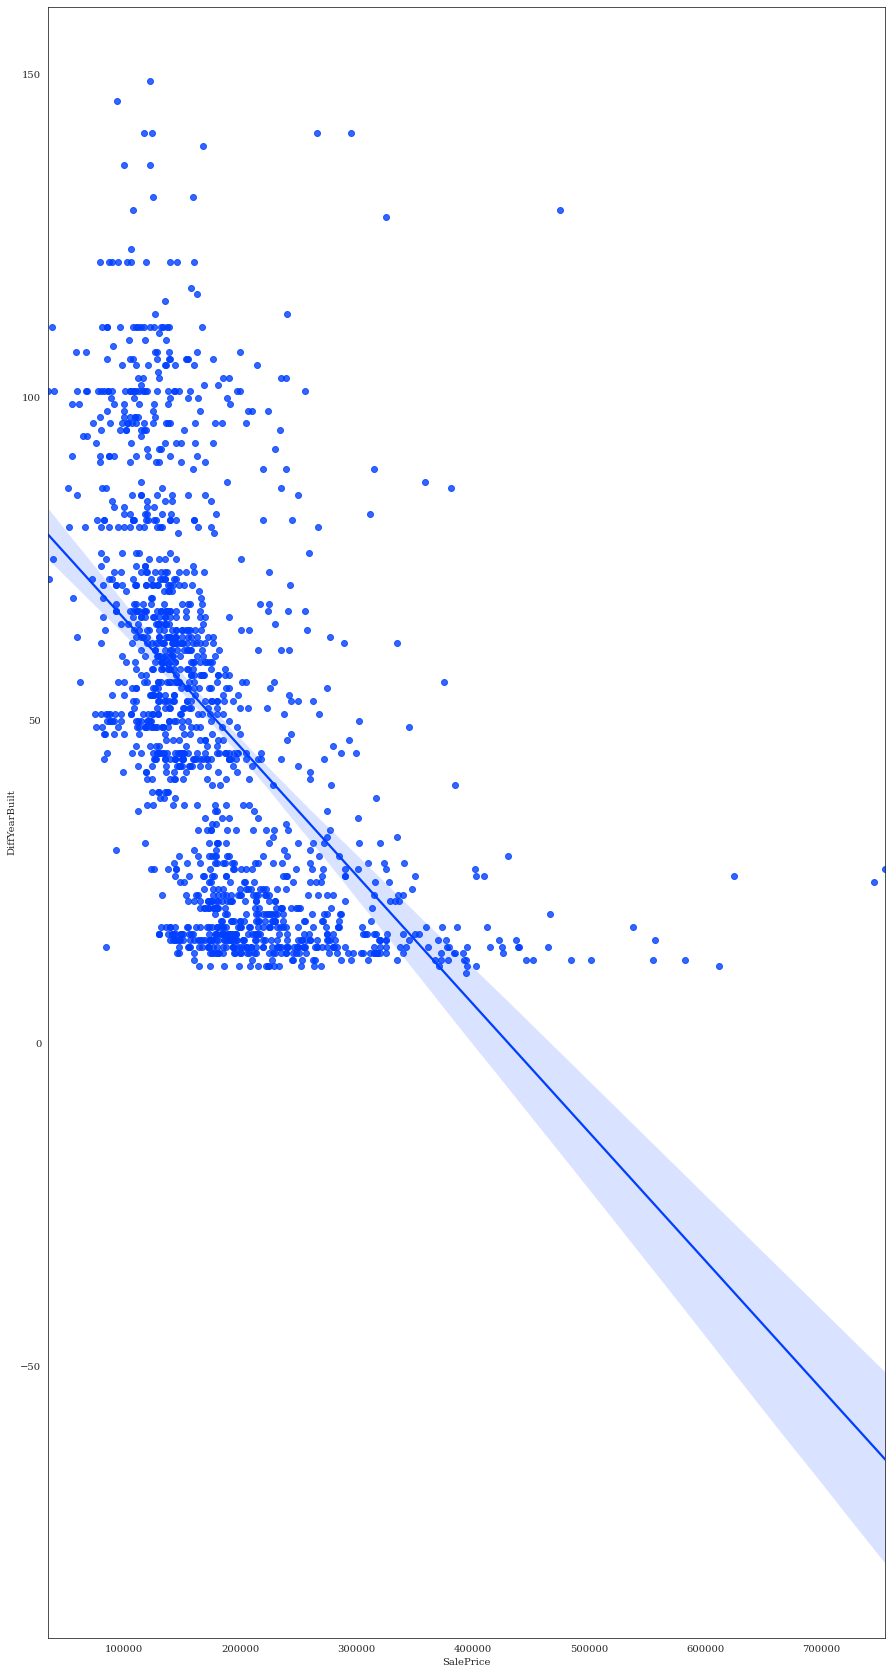

In [20]:
var = ['SalePrice', 'DiffYearBuilt']
plt.figure(figsize = (15,30))
#sns.pairplot(data=df,vars=var)
sns.regplot(x="SalePrice", y="DiffYearBuilt", data=df);
plt.show()

the data in scatter analysis for Sales vs Year Built follows straight line. 

after understanding the data EDA, we started to creates dummpy variables and scalling the data for continues data set. 

In [21]:
df['Age'] = pd.datetime.now().year - df['YearBuilt']

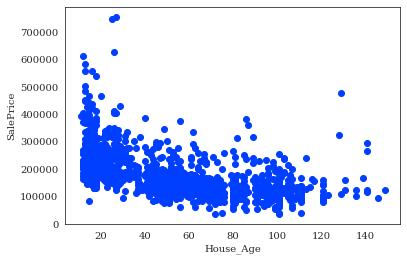

In [22]:
plt.scatter(x=df['Age'], y=df['SalePrice'])
plt.xlabel("House_Age"); plt.ylabel("SalePrice");

##  Categorical and Continues Variables

In [23]:
# Create List of Categorical and Continues Variables 
CatrgoricalCols = []
ContinuesCols = []

out_col = 'SalePrice'

for col in list(df):
    if df[col].dtypes == 'object':
        CatrgoricalCols.append(col)  
    else:
        ContinuesCols.append(col)
print('Categorical columns:\n',CatrgoricalCols)

print('Continues Variable columns:\n',ContinuesCols)

Categorical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
Continues Variable columns:
 ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'DiffYearBuilt', 'DiffYearRemodAdd', 'Age']


## Function for Analysis of Categorical column

In [24]:
def run_analysis_categorical(i, col_i,col_o):
    plt.figure(i)
    plt.figure(figsize=(30,5))
    my_order = df[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=df[[col_i,col_o]], order=my_order.index)

0it [00:00, ?it/s]

<Figure size 432x288 with 0 Axes>

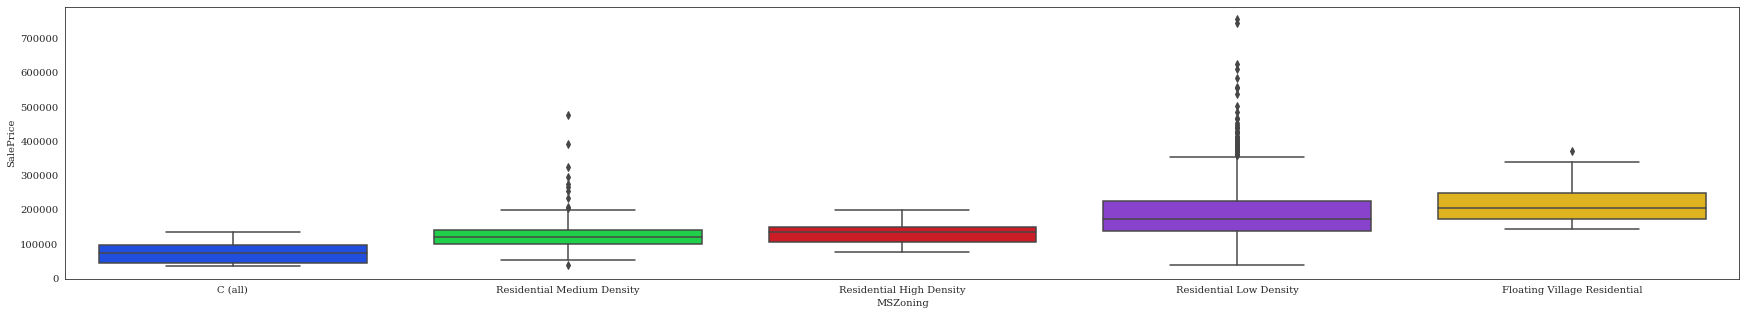

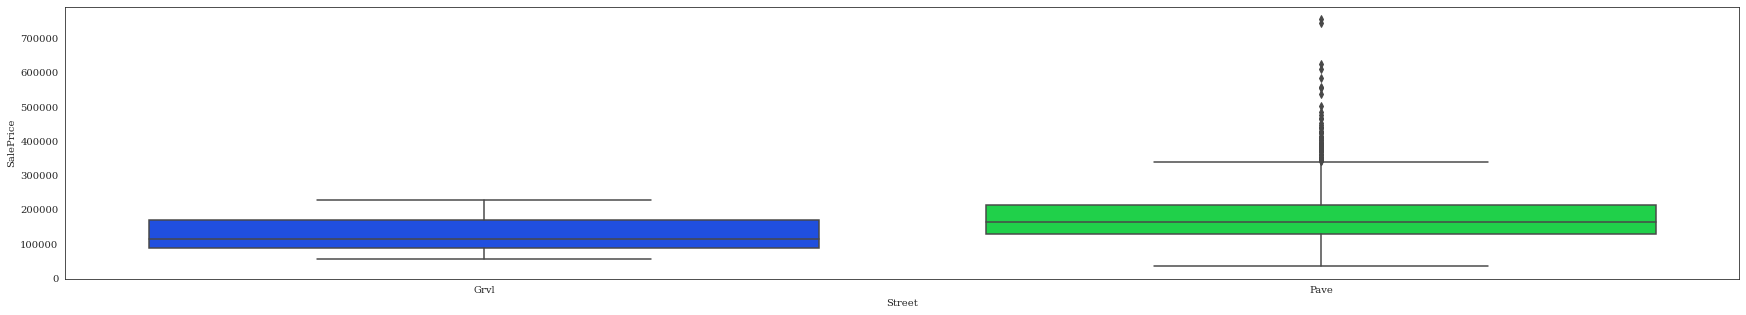

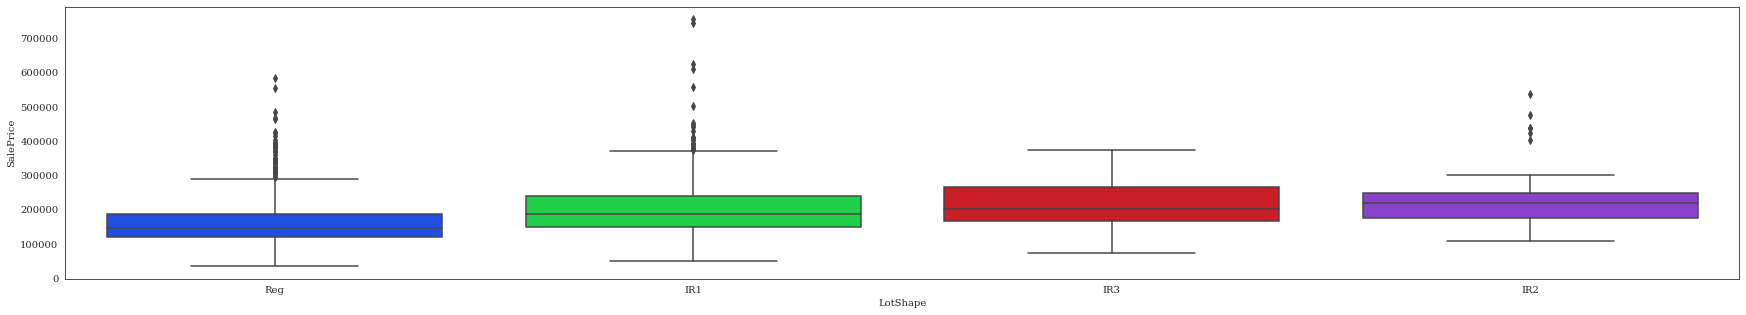

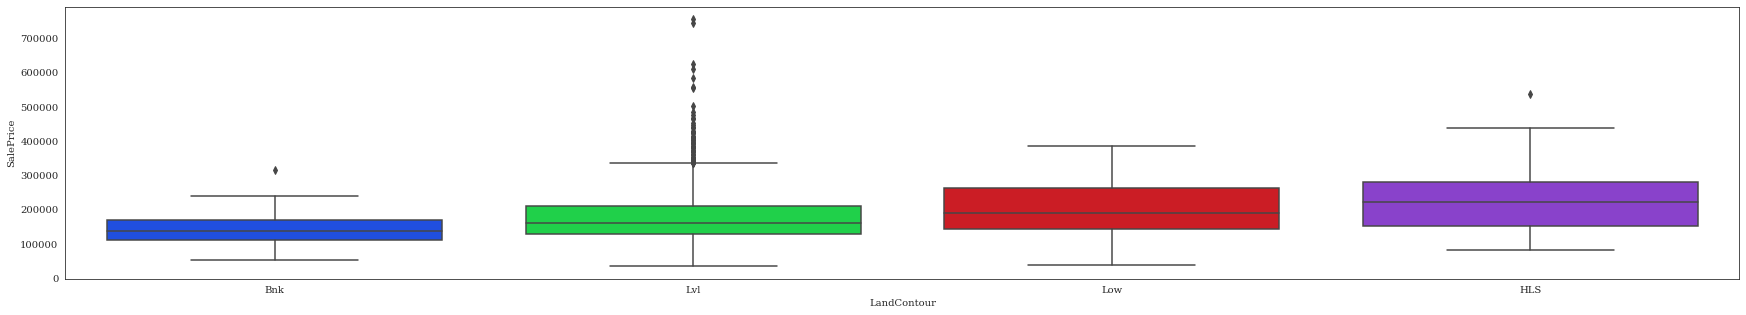

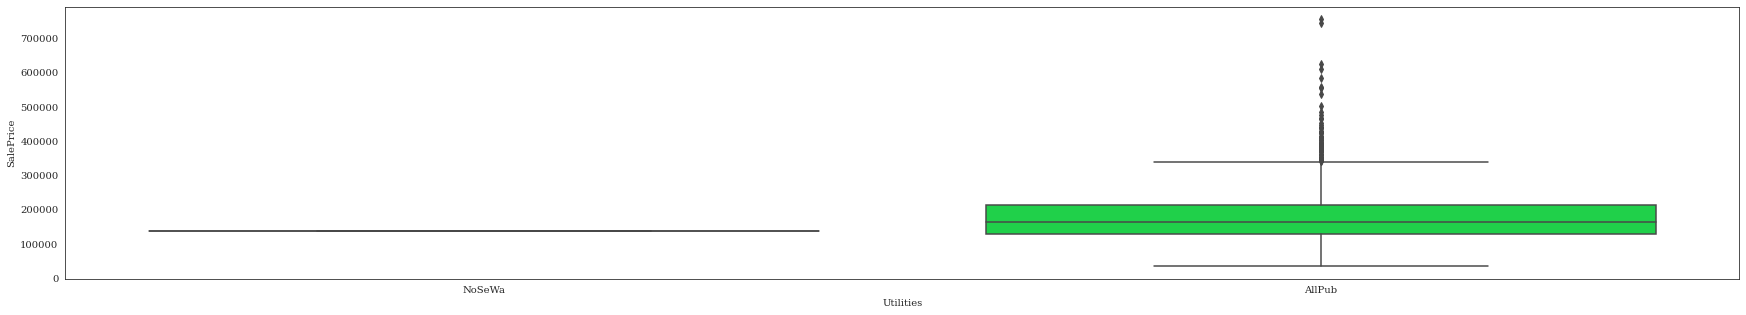

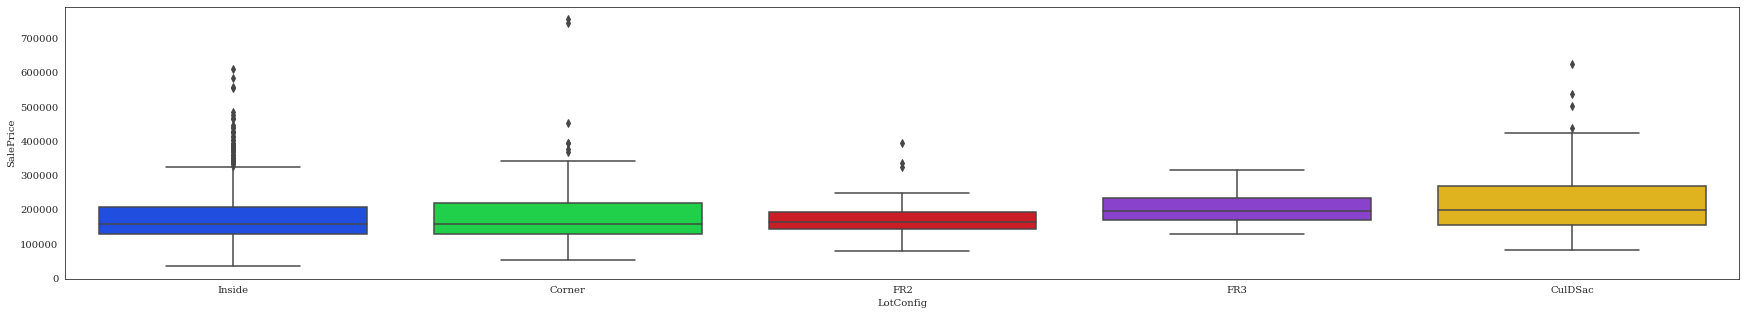

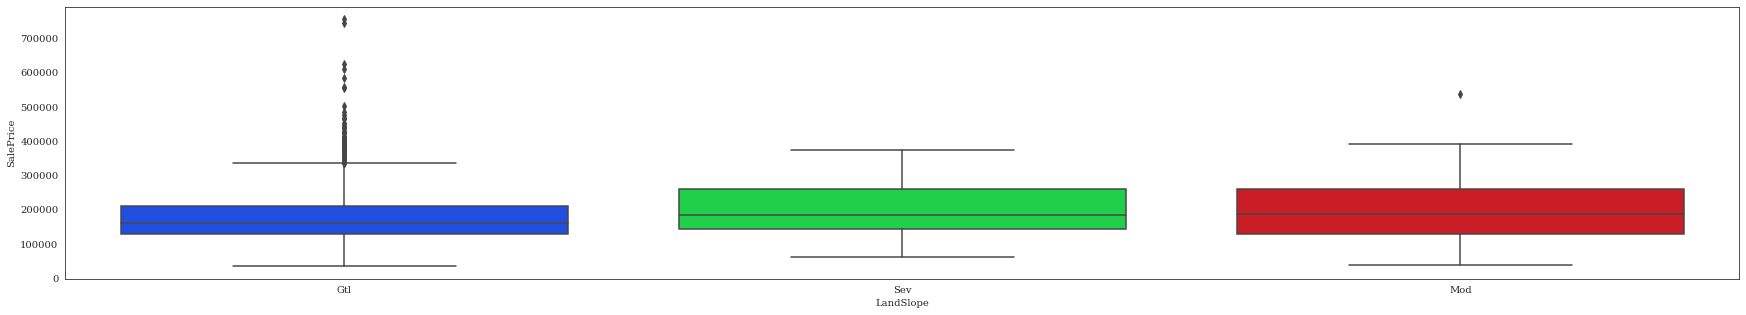

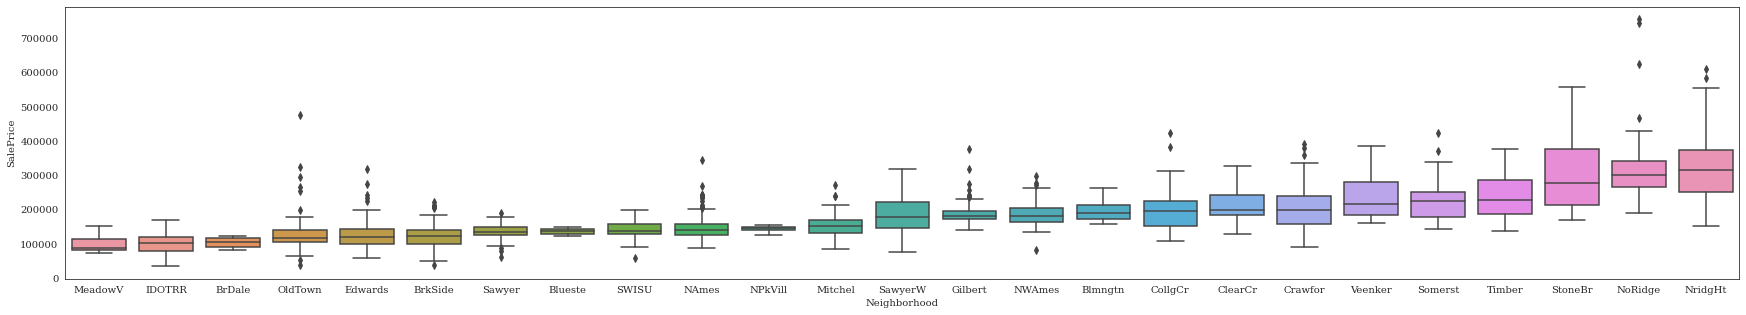

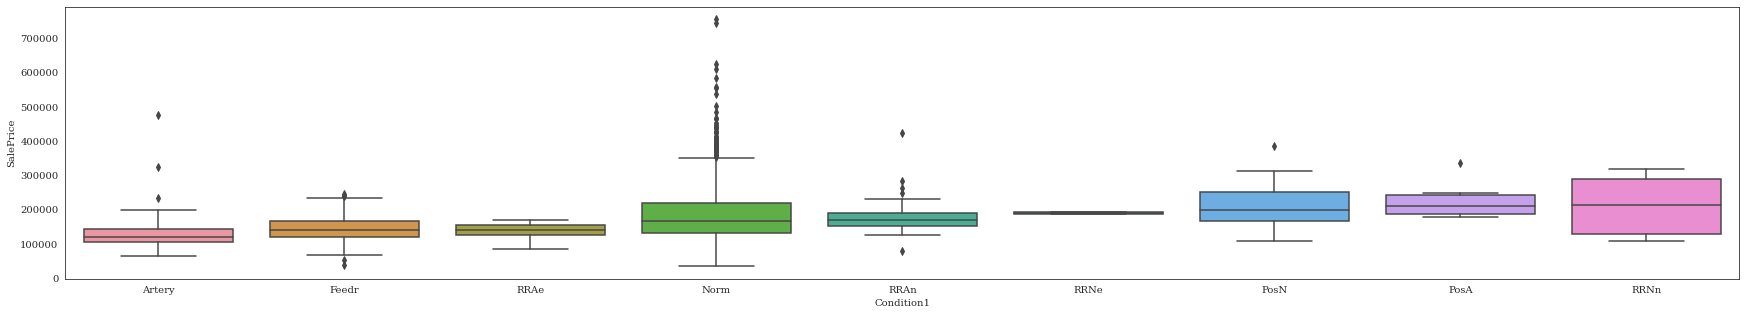

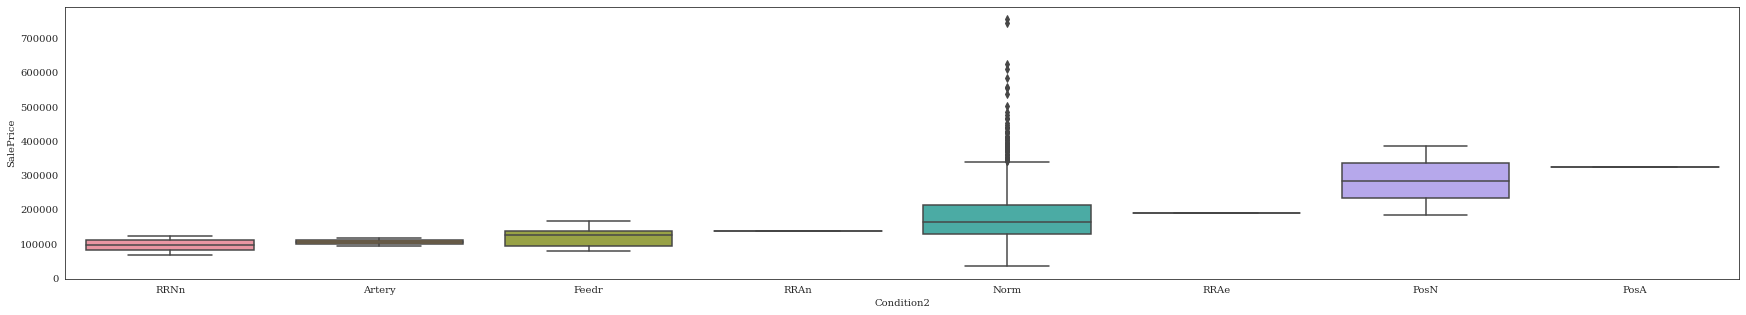

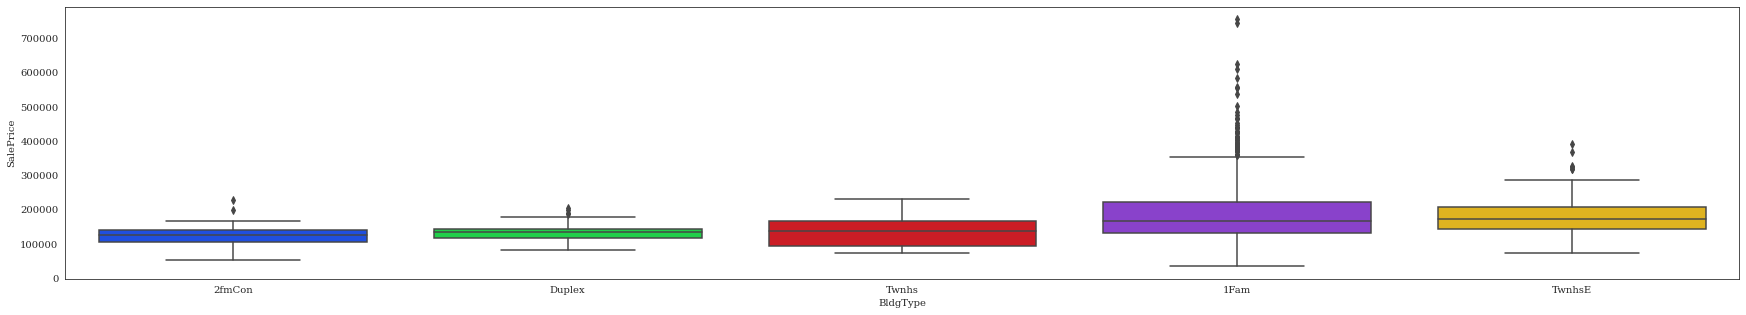

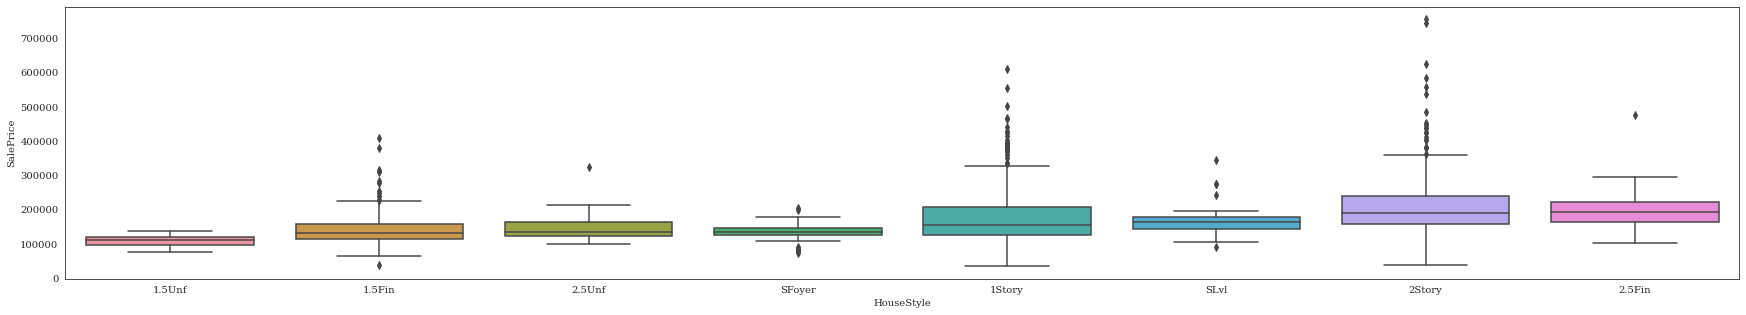

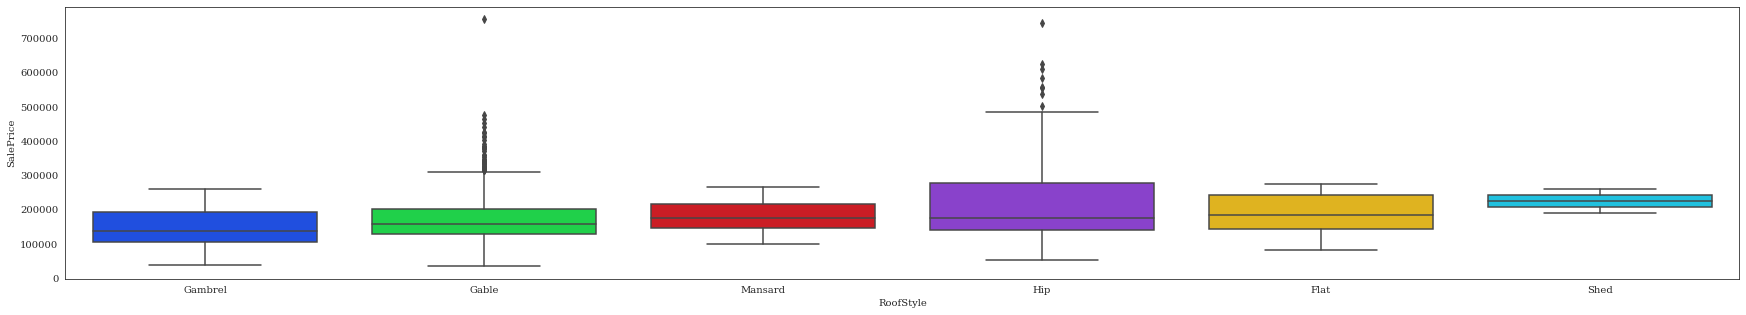

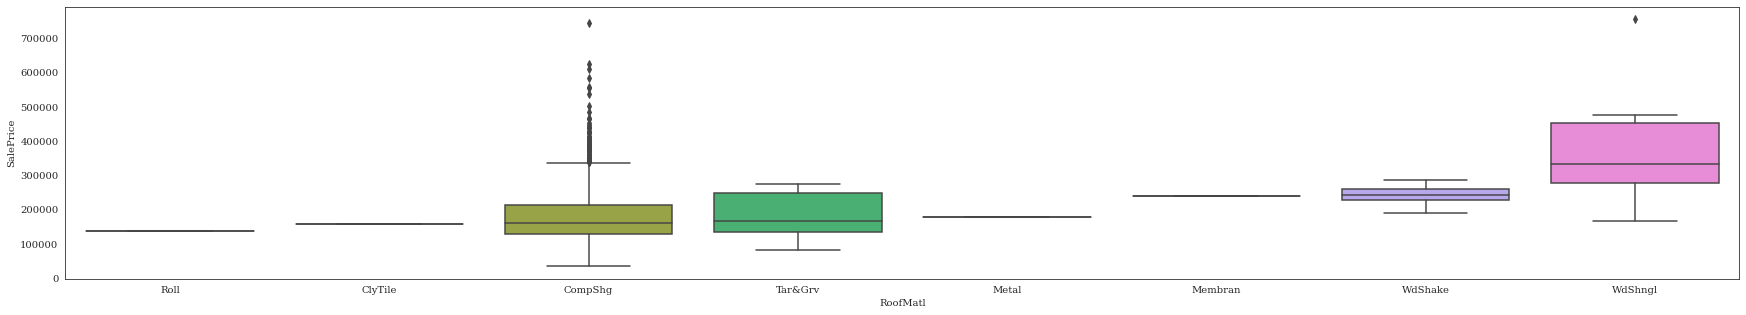

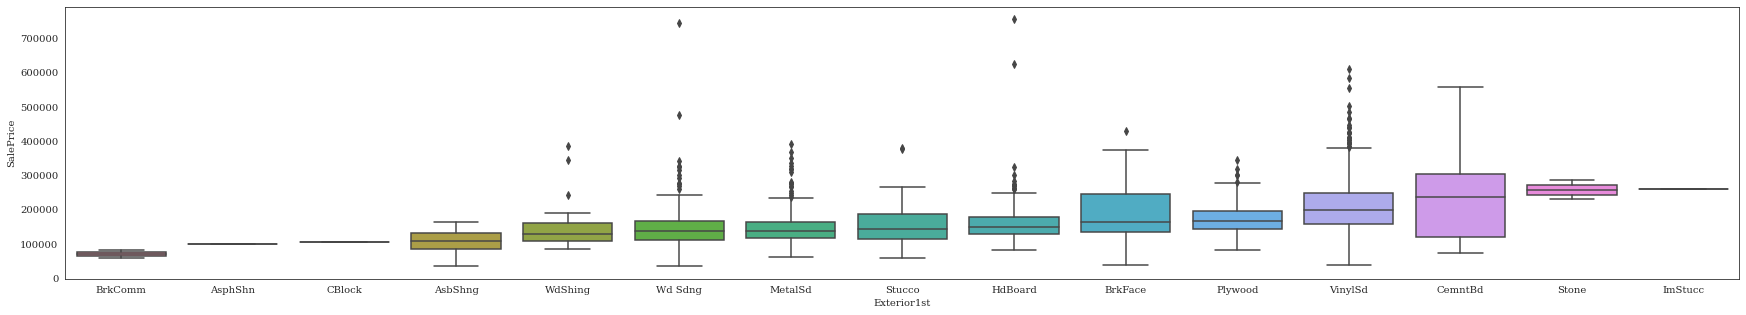

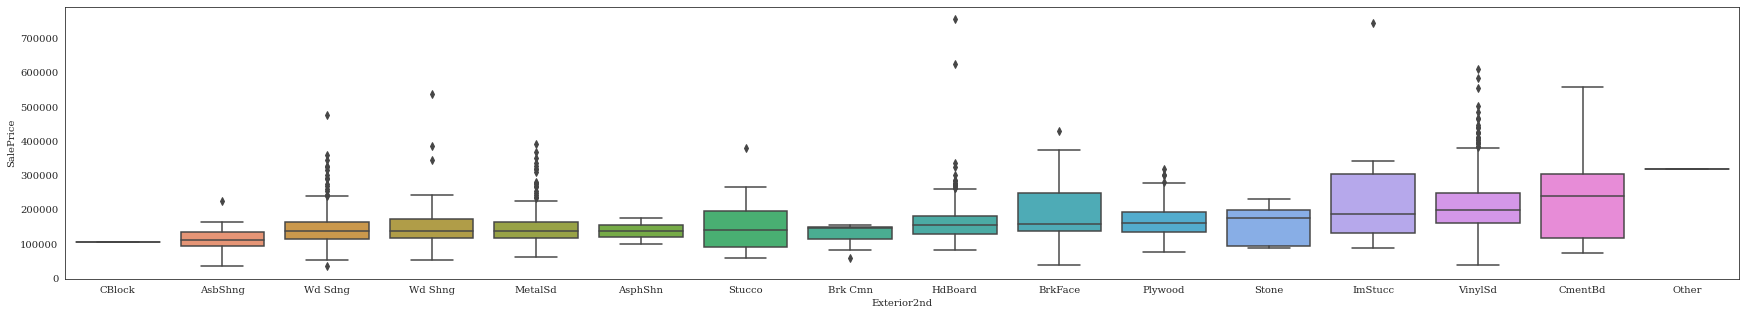

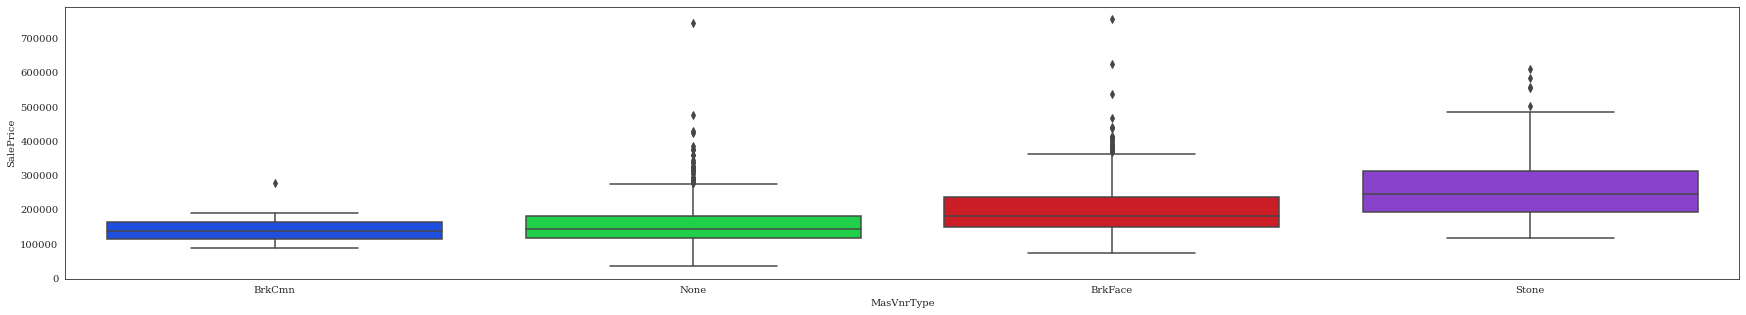

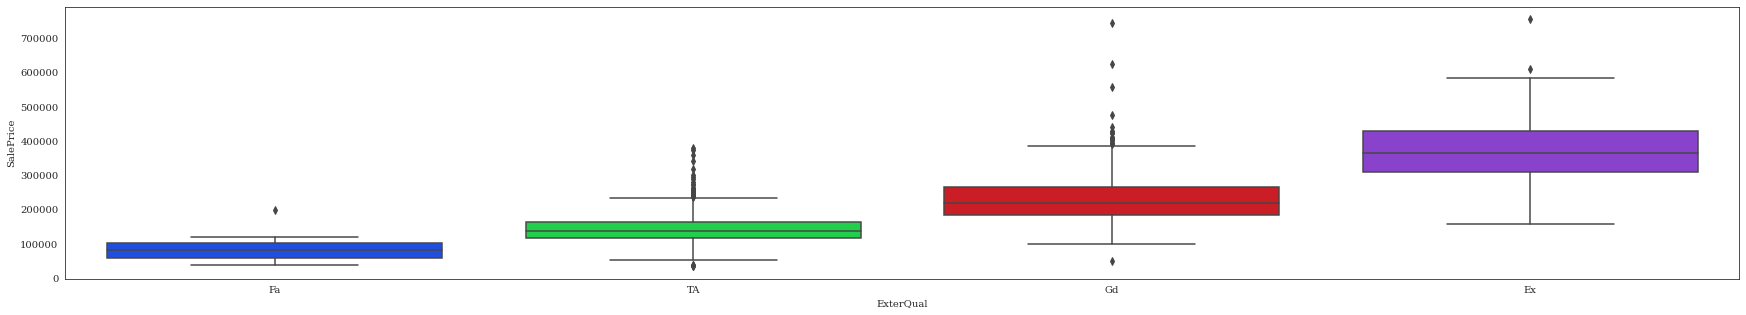

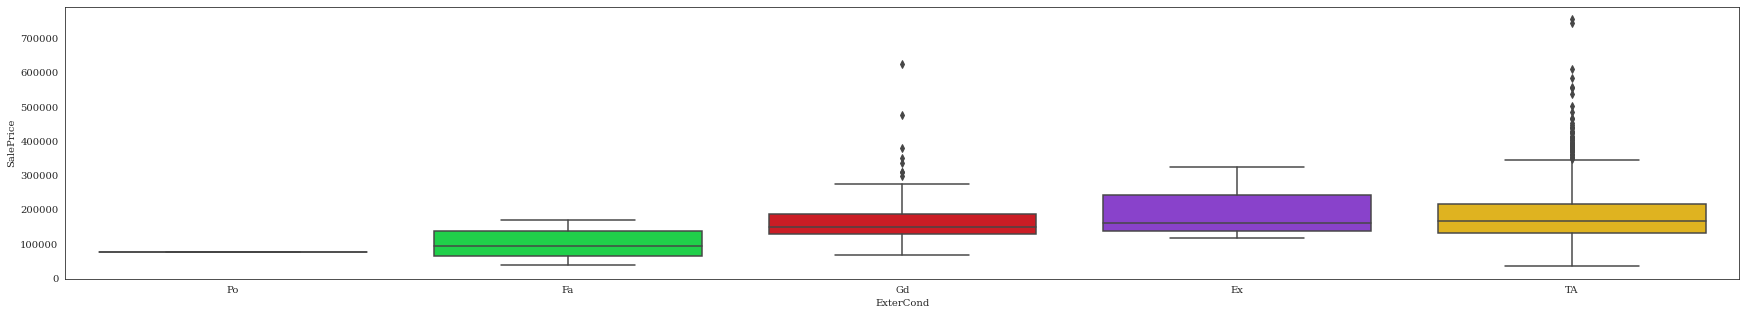

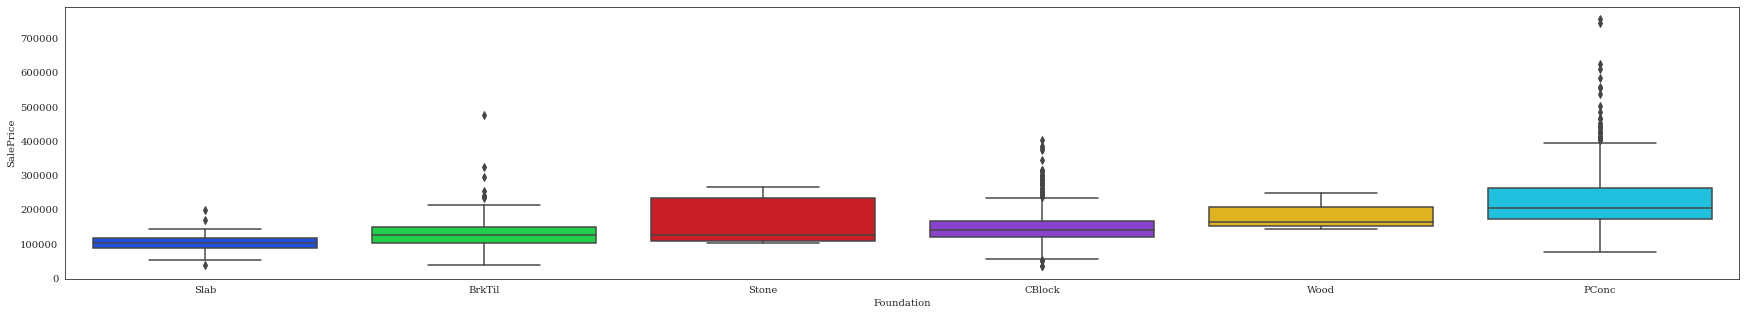

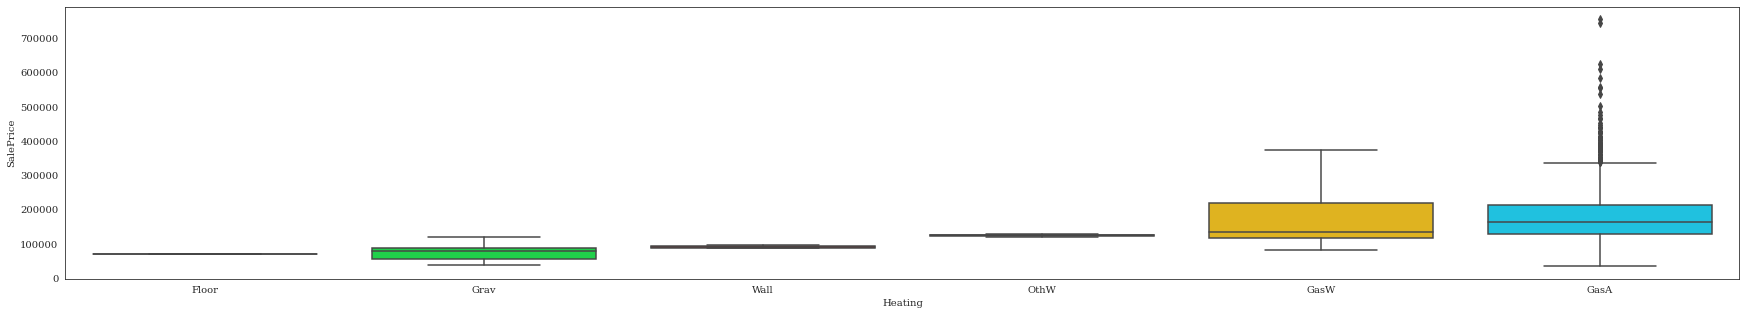

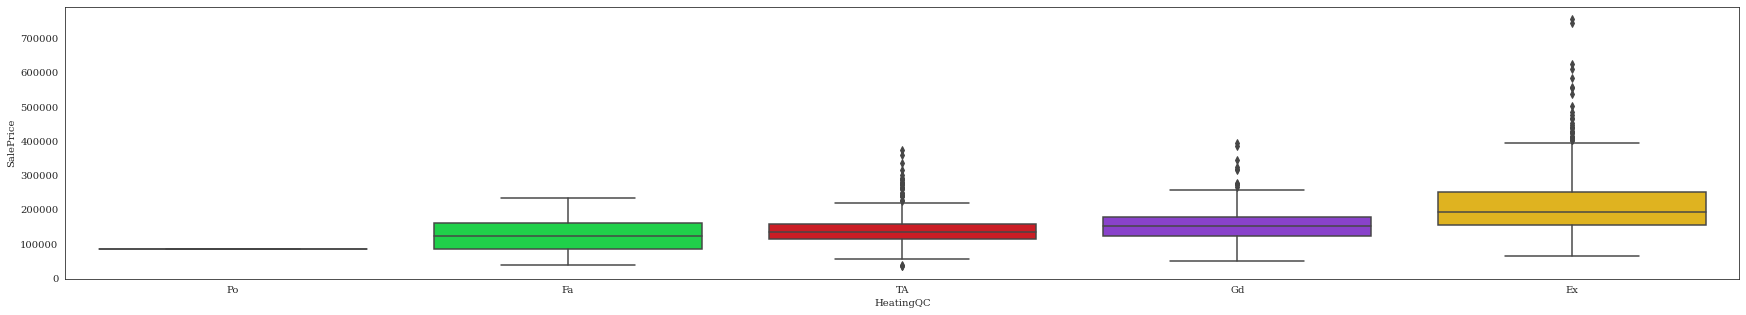

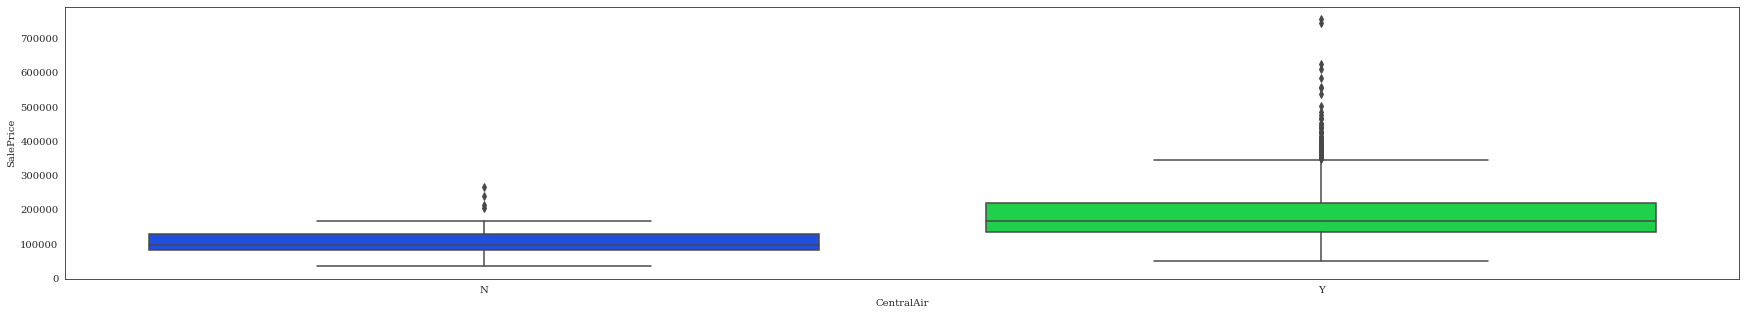

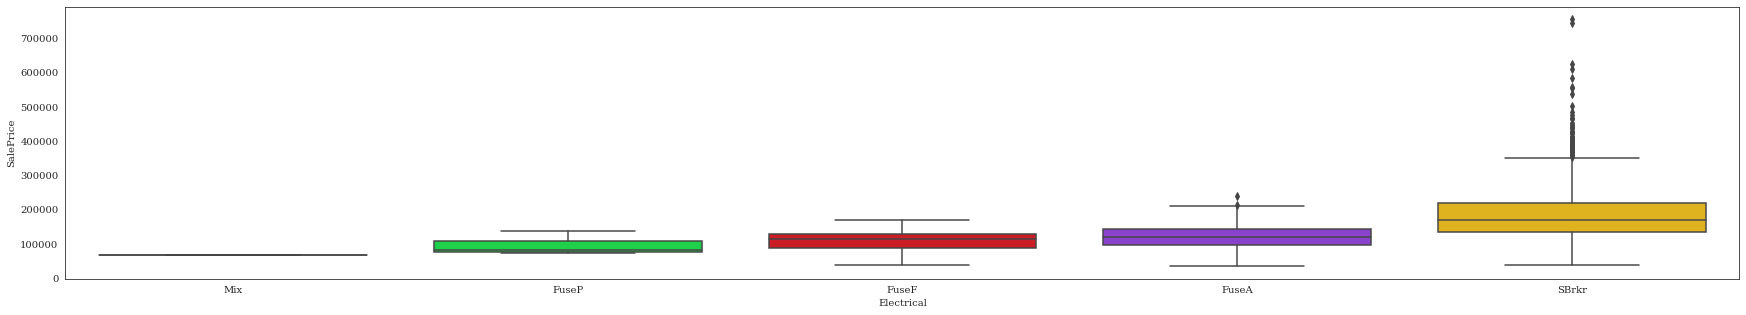

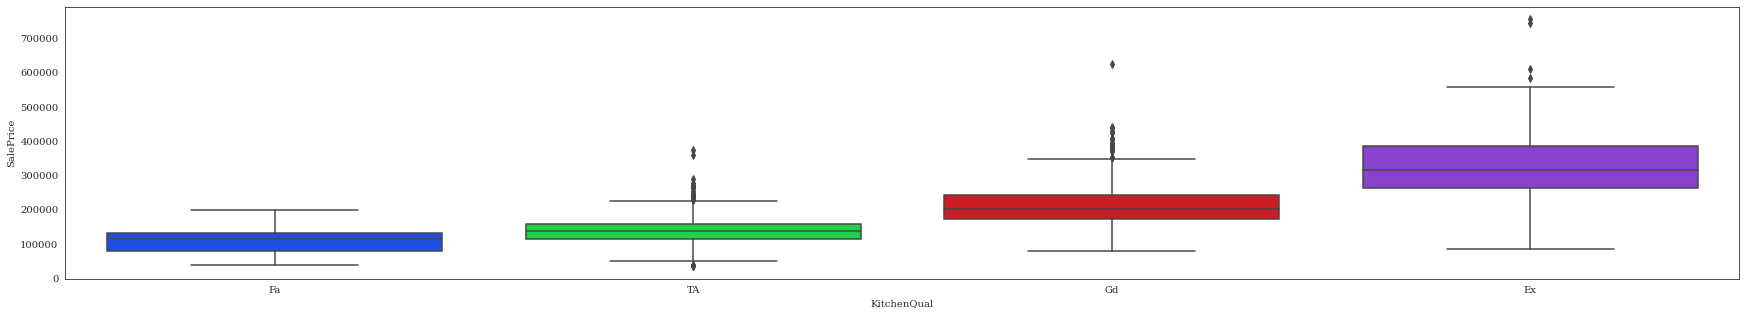

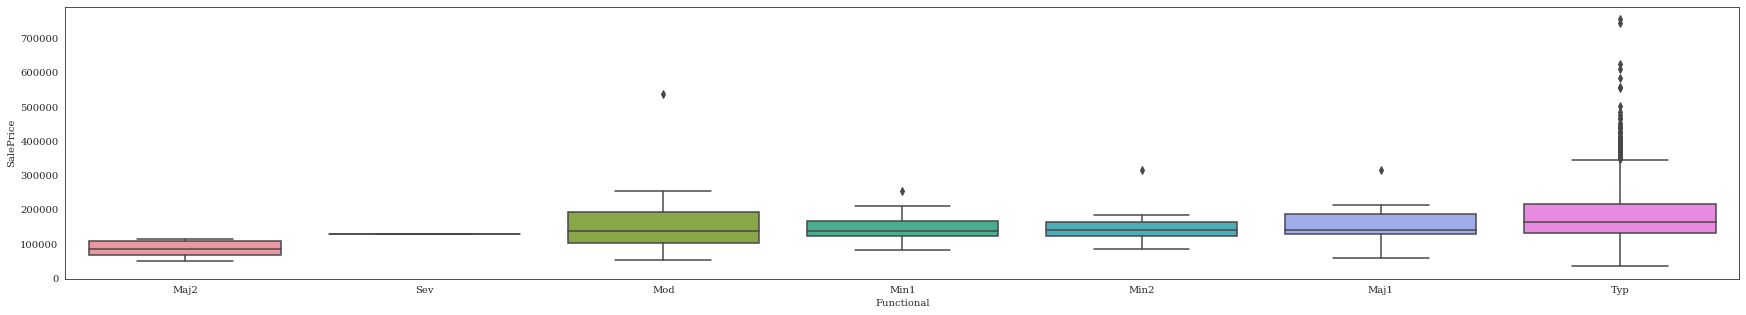

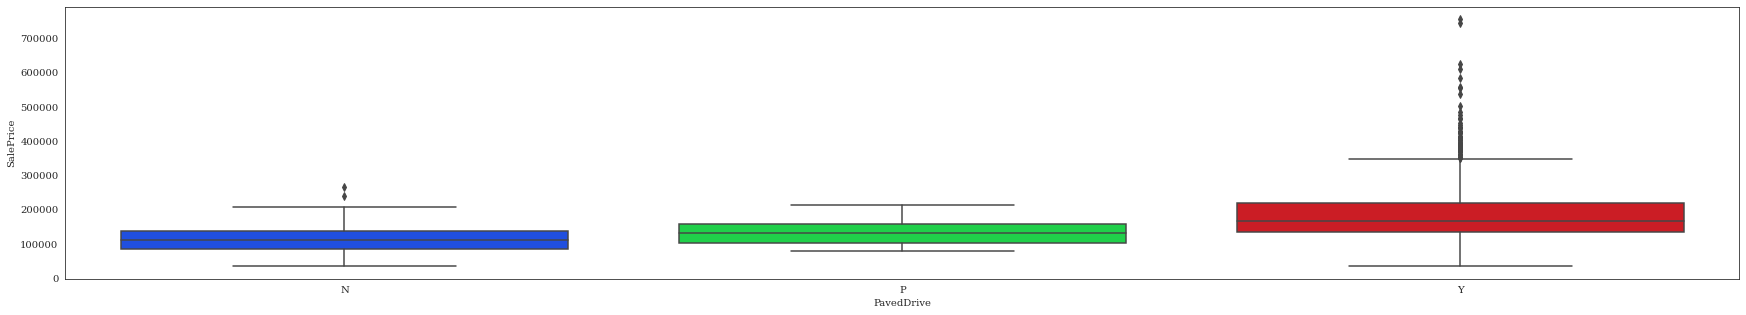

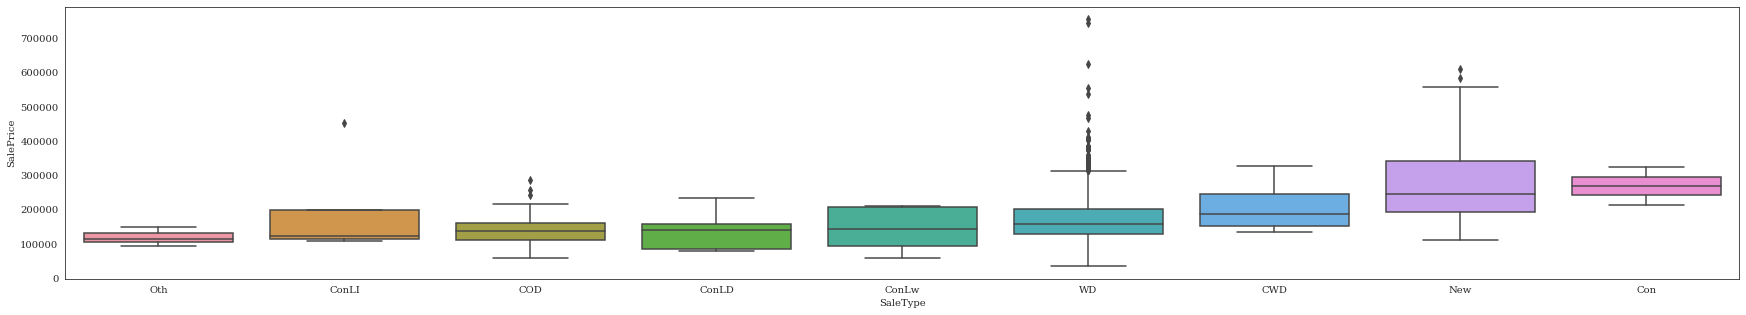

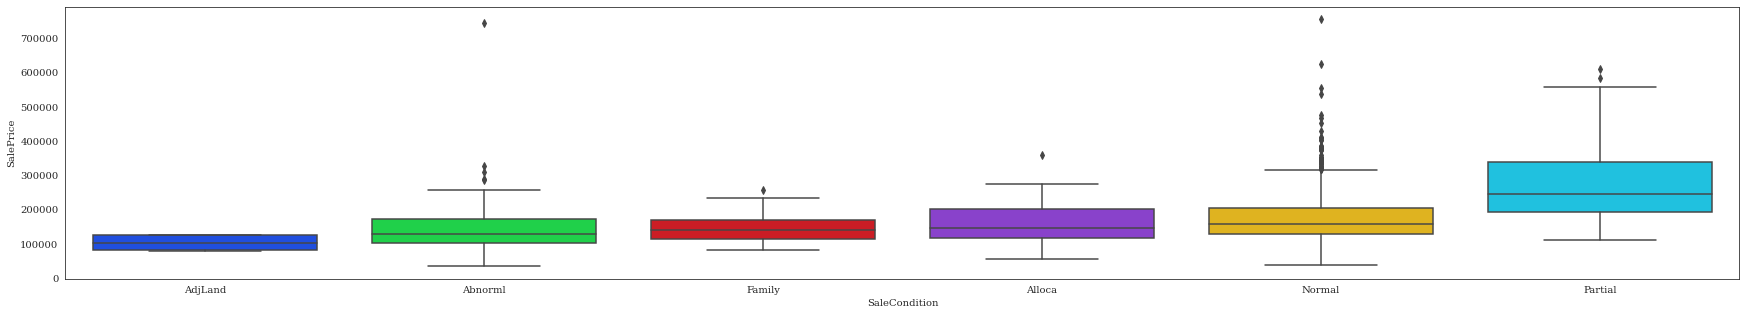

In [25]:
# CATEGORICAL COLUMN ANALYSIS
for i, col in tqdm(enumerate(CatrgoricalCols)):
    run_analysis_categorical(i, col, out_col)


## Create Dummpy Variables 

In [26]:
#we create dummy categorical variables
df_categorical_variable = pd.get_dummies(df[CatrgoricalCols], drop_first=True)

In [27]:
#df_categorical_variable.head(1)

In [28]:
# Concat dataframe with catagorical variables (dummy) with the the  dataframe (df_dropped)
df_combined = pd.concat([df, df_categorical_variable], axis=1)
df_combined.shape

(1460, 230)

In [29]:
# We will drop the original columns which are not relevent and NAs , after we have created categorical variables (dummy variables) 
data = df_combined.drop(CatrgoricalCols, axis = 1)
data = data.dropna()
data.shape

(1452, 201)

## Train Test Split

In [30]:
y=data['SalePrice']
X=data.drop('SalePrice', axis=1)

In [31]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7, test_size=0.3, random_state=seed)

we create train test split for running lasso and ridge analysis, we randomize with fix seed.

In [32]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1016, 200)
X_test Shape: (436, 200)
y_train Shape: (1016,)
y_test Shape: (436,)


## Scaling Features

In [33]:
## we will scale non Binary features continues variables to scaling.  
scaler = StandardScaler()

#Fit and transform training set only
ContinuesCols_excludingSalePrice = ContinuesCols.copy()
ContinuesCols_excludingSalePrice.remove('SalePrice')
X_train[ContinuesCols_excludingSalePrice] = scaler.fit_transform(X_train[ContinuesCols_excludingSalePrice])
X_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,...,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
25,-1.68,-0.88,0.32,1.38,-0.52,1.18,1.07,3.04,-0.99,-0.29,2.24,1.22,1.16,-0.80,-0.12,0.18,-0.78,-0.24,0.80,-0.76,0.17,-0.21,0.31,0.63,1.66,...,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
88,-1.53,-0.18,-0.19,-2.25,-3.21,-1.89,-0.16,-0.57,-0.99,-0.29,0.99,-0.09,-0.38,-0.80,11.32,0.04,-0.78,-0.24,-1.04,-0.76,-1.06,-0.21,-0.31,-0.94,-2.37,...,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
986,0.59,-0.18,-0.47,-0.07,2.17,-2.05,0.87,-0.57,-0.99,-0.29,-0.20,-1.34,-0.41,0.67,-0.12,0.25,-0.78,-0.24,-1.04,-0.76,-1.06,-0.21,-0.93,-0.94,-1.03,...,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1444,1.68,-0.88,-0.19,0.65,-0.52,1.08,0.92,0.03,-0.99,-0.29,1.92,0.88,0.69,-0.80,-0.12,-0.17,-0.78,-0.24,0.80,-0.76,0.17,-0.21,0.31,-0.94,0.31,...,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1108,0.88,0.06,-0.22,-0.07,-0.52,0.95,0.73,-0.57,-0.99,-0.29,0.79,-0.30,-0.55,0.92,-0.12,0.36,-0.78,-0.24,0.80,1.23,0.17,-0.21,0.31,0.63,0.31,...,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [34]:
display(X_train.describe())

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,...,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,"1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00",...,"1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00","1,016.00"
mean,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,...,0.92,0.02,0.42,0.50,0.00,0.02,0.03,0.00,0.00,0.94,0.02,0.92,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.87,0.00,0.01,0.01,0.82,0.08
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.28,0.14,0.49,0.50,0.06,0.14,0.16,0.06,0.03,0.24,0.14,0.27,0.06,0.04,0.07,0.05,0.06,0.28,0.04,0.34,0.06,0.09,0.11,0.38,0.28
min,-1.74,-0.88,-0.83,-2.98,-3.21,-3.32,-1.73,-0.57,-0.99,-0.29,-1.29,-2.49,-1.88,-0.80,-0.12,-2.10,-0.78,-0.24,-2.87,-0.76,-3.52,-4.77,-2.17,-0.94,-2.37,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.85,-0.88,-0.28,-0.80,-0.52,-0.59,-0.84,-0.57,-0.99,-0.29,-0.78,-0.61,-0.72,-0.80,-0.12,-0.76,-0.78,-0.24,-1.04,-0.76,-1.06,-0.21,-0.93,-0.94,-1.03,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
50%,0.03,-0.18,-0.11,-0.07,-0.52,0.05,0.43,-0.57,-0.15,-0.29,-0.18,-0.16,-0.22,-0.80,-0.12,-0.10,-0.78,-0.24,0.80,-0.76,0.17,-0.21,-0.31,0.63,0.31,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
75%,0.87,0.29,0.08,0.65,0.37,0.95,0.92,0.35,0.61,-0.29,0.54,0.54,0.61,0.89,-0.12,0.53,1.13,-0.24,0.80,1.23,0.17,-0.21,0.31,0.63,0.31,...,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
max,1.71,3.11,18.21,2.83,3.06,1.28,1.22,8.44,4.17,6.80,3.98,5.10,5.42,3.98,11.36,6.23,4.96,8.08,2.63,3.22,6.32,8.91,4.65,3.76,3.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [35]:
display(y_train.describe())

count     1,016.00
mean    180,039.41
std      77,808.82
min      34,900.00
25%     129,375.00
50%     163,000.00
75%     213,492.50
max     745,000.00
Name: SalePrice, dtype: float64

In [36]:
X_test[ContinuesCols_excludingSalePrice] = scaler.transform(X_test[ContinuesCols_excludingSalePrice])
X_test.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,...,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
157,-1.37,0.06,0.13,1.38,-0.52,1.25,1.22,-0.09,-0.99,-0.29,0.46,-0.65,-1.00,1.97,-0.12,0.91,-0.78,-0.24,0.80,1.23,1.40,-0.21,0.93,0.63,1.66,...,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
337,-0.94,-0.88,-0.13,0.65,-0.52,1.01,0.87,0.07,0.86,-0.29,0.35,1.15,0.99,-0.80,-0.12,0.06,1.13,-0.24,0.80,-0.76,0.17,-0.21,0.31,-0.94,0.31,...,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1120,0.91,-0.65,-0.21,-0.07,-0.52,-1.72,-1.73,-0.57,-0.99,-0.29,0.99,-0.09,-0.38,-0.80,-0.12,-0.97,-0.78,-0.24,-1.04,-0.76,-1.06,-0.21,-0.31,0.63,-1.03,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
563,-0.41,-0.18,1.00,-0.07,1.27,-1.79,-1.73,-0.57,-0.99,-0.29,1.33,0.27,0.02,0.38,-0.12,0.33,-0.78,-0.24,0.80,-0.76,1.40,-0.21,0.93,0.63,0.31,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
371,-0.86,-0.18,0.58,-1.53,-1.42,-0.42,-1.29,-0.57,-0.99,-0.29,-1.29,-2.49,-0.10,0.28,-0.12,0.16,-0.78,-0.24,0.80,-0.76,1.40,-0.21,0.31,0.63,0.31,...,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [37]:
y_test.describe().T

count       436.00
mean    181,956.50
std      82,700.46
min      35,311.00
25%     130,187.50
50%     160,000.00
75%     215,000.00
max     755,000.00
Name: SalePrice, dtype: float64

## Fit Regression using Ridge Regression

In [38]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,10000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cross_validation = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', # https://scikit-learn.org/stable/modules/model_evaluation.html
                                      # https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cross_validation.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
cv_ridge_results = pd.DataFrame(model_cross_validation.cv_results_)
cv_ridge_results = cv_ridge_results[cv_ridge_results['param_alpha']<=500]
cv_ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.01,0.00,0.00,0.00,0.00,{'alpha': 0.0001},"-20,189.69","-18,239.21","-19,326.05","-17,246.65","-19,205.05","-18,841.33","1,009.05",26,"-12,914.37","-13,652.15","-13,482.29","-14,138.38","-13,263.24","-13,490.09",407.31
1,0.01,0.00,0.00,0.00,0.00,{'alpha': 0.001},"-20,185.16","-18,234.44","-19,318.54","-17,243.31","-19,198.67","-18,836.02","1,008.28",25,"-12,915.05","-13,653.15","-13,482.41","-14,138.04","-13,263.94","-13,490.52",407.02
2,0.01,0.00,0.00,0.00,0.01,{'alpha': 0.01},"-20,143.64","-18,189.63","-19,260.19","-17,208.78","-19,137.58","-18,787.96","1,003.48",24,"-12,921.52","-13,665.94","-13,484.19","-14,134.62","-13,273.11","-13,495.88",404.12
3,0.01,0.00,0.00,0.00,0.05,{'alpha': 0.05},"-20,106.16","-18,022.46","-19,153.90","-17,061.30","-18,917.18","-18,652.20","1,035.71",23,"-12,951.40","-13,716.89","-13,494.18","-14,144.56","-13,318.73","-13,525.15",398.29
4,0.01,0.00,0.00,0.00,0.10,{'alpha': 0.1},"-20,063.02","-17,870.40","-19,049.01","-16,903.64","-18,721.39","-18,521.49","1,071.06",21,"-12,981.45","-13,772.30","-13,515.14","-14,163.11","-13,372.93","-13,560.99",395.10


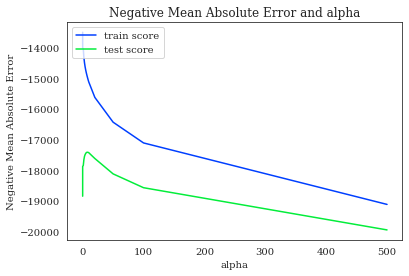

<Figure size 2160x4320 with 0 Axes>

In [40]:

# plotting mean test and train scoes with alpha 
cv_ridge_results['param_alpha'] = cv_ridge_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_ridge_results['param_alpha'], cv_ridge_results['mean_train_score'])
plt.plot(cv_ridge_results['param_alpha'], cv_ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.figure(figsize = (30,60))
plt.show()

In [41]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=10)

## Lasso

In [42]:
lasso = Lasso()

# cross validation
folds = 5
model_cross_validation_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cross_validation_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [43]:
cv_lasso_results = pd.DataFrame(model_cross_validation_lasso.cv_results_)
cv_lasso_results = cv_lasso_results[cv_lasso_results['param_alpha']<=500]
cv_lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.12,0.01,0.00,0.00,0.00,{'alpha': 0.0001},"-20,187.05","-18,143.67","-19,326.39","-17,228.00","-19,205.65","-18,818.15","1,026.24",27,"-12,914.60","-13,652.04","-13,482.14","-14,138.63","-13,263.19","-13,490.12",407.32
1,0.12,0.01,0.00,0.00,0.00,{'alpha': 0.001},"-20,186.91","-18,143.49","-19,326.22","-17,227.57","-19,205.52","-18,817.94","1,026.33",26,"-12,914.61","-13,652.04","-13,482.14","-14,138.63","-13,263.19","-13,490.12",407.32
2,0.12,0.00,0.00,0.00,0.01,{'alpha': 0.01},"-20,185.52","-18,141.73","-19,324.50","-17,223.30","-19,204.22","-18,815.86","1,027.25",25,"-12,914.80","-13,652.09","-13,482.18","-14,138.59","-13,263.22","-13,490.18",407.26
3,0.12,0.00,0.00,0.00,0.05,{'alpha': 0.05},"-20,179.43","-18,133.91","-19,316.65","-17,216.47","-19,198.45","-18,808.98","1,027.56",24,"-12,915.69","-13,652.28","-13,482.35","-14,138.59","-13,263.34","-13,490.45",407.00
4,0.12,0.00,0.00,0.00,0.10,{'alpha': 0.1},"-20,171.84","-18,124.13","-19,306.90","-17,210.09","-19,191.23","-18,800.84","1,027.28",23,"-12,916.81","-13,652.60","-13,482.66","-14,138.63","-13,263.50","-13,490.84",406.71


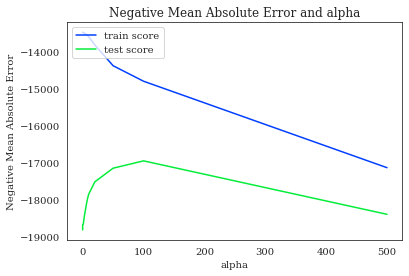

<Figure size 2160x4320 with 0 Axes>

In [44]:

# plotting mean test and train scoes with alpha 
cv_lasso_results['param_alpha'] = cv_lasso_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_lasso_results['param_alpha'], cv_lasso_results['mean_train_score'])
plt.plot(cv_lasso_results['param_alpha'], cv_lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.figure(figsize = (30,60))
plt.show()

In [45]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [46]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.9021995741756837
r2_score for lasso: 0.9161439817725683


## Model Parameters and Coeff

In [47]:
#ridge model parameters
model_parameters_ridge = list(ridge.coef_)
model_parameters_ridge.insert(0, ridge.intercept_)
model_parameters_ridge = [round(x, 3) for x in model_parameters_ridge]
#model_parameters

In [48]:
cols_ridge = X.columns
cols_ridge

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=200)

In [49]:
cols_ridge = cols_ridge.insert(0, "constant")

var_coeff_ridge = list(zip(cols_ridge, model_parameters_ridge))

In [50]:
var_coeff_ridge

[('constant', 162516.975),
 ('Id', -192.626),
 ('MSSubClass', -4116.279),
 ('LotArea', 5047.088),
 ('OverallQual', 14414.329),
 ('OverallCond', 6781.467),
 ('YearBuilt', 3080.07),
 ('YearRemodAdd', 1419.951),
 ('MasVnrArea', 5108.476),
 ('BsmtFinSF1', 7475.419),
 ('BsmtFinSF2', -60.262),
 ('BsmtUnfSF', -142.68),
 ('TotalBsmtSF', 7583.345),
 ('1stFlrSF', 6952.837),
 ('2ndFlrSF', 9494.866),
 ('LowQualFinSF', -1476.739),
 ('GrLivArea', 13159.465),
 ('BsmtFullBath', 3620.009),
 ('BsmtHalfBath', -645.813),
 ('FullBath', 1879.616),
 ('HalfBath', 2136.969),
 ('BedroomAbvGr', -3976.807),
 ('KitchenAbvGr', -3865.304),
 ('TotRmsAbvGrd', 5656.139),
 ('Fireplaces', 2550.154),
 ('GarageCars', 4802.416),
 ('GarageArea', 993.815),
 ('WoodDeckSF', 2619.651),
 ('OpenPorchSF', 60.213),
 ('EnclosedPorch', 451.447),
 ('3SsnPorch', 1735.965),
 ('ScreenPorch', 51.343),
 ('PoolArea', 4022.133),
 ('MiscVal', -626.91),
 ('MoSold', -522.121),
 ('YrSold', 109.713),
 ('DiffYearBuilt', -3080.07),
 ('DiffYearRemodA

## Lasso

In [51]:
#lasso model parameters
model_parameters_lasso = list(lasso.coef_)
model_parameters_lasso.insert(0, lasso.intercept_)
model_parameters_lasso = [round(x, 3) for x in model_parameters_lasso]
#model_parameters

In [52]:
lasso_cols = X.columns
lasso_cols

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=200)

In [53]:
lasso_cols = lasso_cols.insert(0, "constant")

var_coeff_lasso = list(zip(lasso_cols, model_parameters_lasso))


In [54]:
var_coeff_lasso

[('constant', 170424.405),
 ('Id', -25.901),
 ('MSSubClass', -3629.95),
 ('LotArea', 5398.196),
 ('OverallQual', 13386.168),
 ('OverallCond', 6775.018),
 ('YearBuilt', 9529.399),
 ('YearRemodAdd', 2653.02),
 ('MasVnrArea', 5123.896),
 ('BsmtFinSF1', 8273.972),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 8367.435),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 511.353),
 ('LowQualFinSF', -2532.95),
 ('GrLivArea', 27178.166),
 ('BsmtFullBath', 2720.945),
 ('BsmtHalfBath', -483.984),
 ('FullBath', 1185.631),
 ('HalfBath', 1367.746),
 ('BedroomAbvGr', -4505.781),
 ('KitchenAbvGr', -3804.766),
 ('TotRmsAbvGrd', 3738.43),
 ('Fireplaces', 1662.524),
 ('GarageCars', 4818.012),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 2490.042),
 ('OpenPorchSF', 773.687),
 ('EnclosedPorch', 171.032),
 ('3SsnPorch', 1102.165),
 ('ScreenPorch', 0.0),
 ('PoolArea', 3535.511),
 ('MiscVal', -296.258),
 ('MoSold', -307.646),
 ('YrSold', -0.0),
 ('DiffYearBuilt', -394.585),
 ('DiffYearRemodAdd', -51.916),
 ('Age', -

## RFE to reduce features

In [55]:
model_ridge = ridge

In [56]:
reduce_feature_ridge = 30 # reduce features to 15

In [57]:
model_rfe_ridge = RFE(model_ridge,reduce_feature_ridge)
model_rfe_ridge.fit(X_train,y_train)

RFE(estimator=Ridge(alpha=10), n_features_to_select=30)

In [58]:
list(zip(X_train.columns,model_rfe_ridge.support_,model_rfe_ridge.ranking_))

[('Id', False, 156),
 ('MSSubClass', False, 4),
 ('LotArea', False, 14),
 ('OverallQual', True, 1),
 ('OverallCond', False, 16),
 ('YearBuilt', False, 48),
 ('YearRemodAdd', False, 69),
 ('MasVnrArea', False, 44),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 164),
 ('BsmtUnfSF', False, 163),
 ('TotalBsmtSF', False, 17),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 104),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 45),
 ('BsmtHalfBath', False, 136),
 ('FullBath', False, 88),
 ('HalfBath', False, 87),
 ('BedroomAbvGr', False, 49),
 ('KitchenAbvGr', False, 56),
 ('TotRmsAbvGrd', False, 50),
 ('Fireplaces', False, 76),
 ('GarageCars', False, 22),
 ('GarageArea', False, 124),
 ('WoodDeckSF', False, 83),
 ('OpenPorchSF', False, 162),
 ('EnclosedPorch', False, 145),
 ('3SsnPorch', False, 100),
 ('ScreenPorch', False, 165),
 ('PoolArea', False, 51),
 ('MiscVal', False, 137),
 ('MoSold', False, 141),
 ('YrSold', False, 161),
 ('DiffYearBuilt', False, 15),
 

## RFE to reduce Lasso

In [59]:
model_lasso = lasso

In [60]:
reduce_feature_lasso = 30 # reduce features to 15

In [61]:
model_rfe_lasso = RFE(model_lasso,reduce_feature_lasso)
model_rfe_lasso.fit(X_train,y_train)

RFE(estimator=Lasso(alpha=100), n_features_to_select=30)

In [62]:
list(zip(X_train.columns,model_rfe_lasso.support_,model_rfe_lasso.ranking_))

[('Id', False, 57),
 ('MSSubClass', True, 1),
 ('LotArea', False, 2),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 23),
 ('MasVnrArea', False, 12),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 74),
 ('BsmtUnfSF', False, 66),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 59),
 ('2ndFlrSF', False, 48),
 ('LowQualFinSF', False, 24),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 22),
 ('BsmtHalfBath', False, 47),
 ('FullBath', False, 33),
 ('HalfBath', False, 34),
 ('BedroomAbvGr', False, 8),
 ('KitchenAbvGr', False, 17),
 ('TotRmsAbvGrd', False, 18),
 ('Fireplaces', False, 31),
 ('GarageCars', False, 5),
 ('GarageArea', False, 100),
 ('WoodDeckSF', False, 25),
 ('OpenPorchSF', False, 44),
 ('EnclosedPorch', False, 54),
 ('3SsnPorch', False, 40),
 ('ScreenPorch', False, 107),
 ('PoolArea', False, 20),
 ('MiscVal', False, 52),
 ('MoSold', False, 51),
 ('YrSold', False, 81),
 ('DiffYearBuilt', False, 49),
 ('DiffYearRemodAd

## Automate the RIDGE Regression post RFE

In [63]:
def model(cols):
    # X_train_model_regression = sm.add_constant(X_train[cols])
    model_regression_ridge = ridge.fit(X_train[cols], y_train)
    y_pred_ridge_train = model_regression_ridge.predict(X_train[cols])
    y_pred_ridge_test = model_regression_ridge.predict(X_test[cols])
    print('r2_score for Training ridge:', r2_score(y_train, y_pred_ridge_train))
    print('r2_score for Testing ridge:', r2_score(y_test, y_pred_ridge_test))
    return model_regression_ridge

In [64]:
cols_ridge = X_train.columns[model_rfe_ridge.support_]

In [65]:
X_train.columns[~model_rfe_ridge.support_] # not in the list 

Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=170)

In [66]:
model(cols_ridge)


r2_score for Training ridge: 0.8598981473762835
r2_score for Testing ridge: 0.7517532730459087


Ridge(alpha=10)

## Automate the LASSO Regression post RFE

In [67]:
def model_lasso(cols):
    # X_train_model_regression = sm.add_constant(X_train[cols])
    model_regression_lasso = lasso.fit(X_train[cols], y_train)
    y_pred_lasso_train = model_regression_lasso.predict(X_train[cols])
    print('r2_score for Training lasso:', r2_score(y_train, y_pred_lasso_train))
    y_pred_ridge_test = model_regression_lasso.predict(X_test[cols])
    print('r2_score for Testing lasso =:', r2_score(y_test, y_pred_ridge_test))
    #print(model_regression.summary())
    return model_regression_lasso

In [68]:
cols_lasso = X_train.columns[model_rfe_lasso.support_]

In [69]:
model(cols_lasso)


r2_score for Training ridge: 0.873095741060231
r2_score for Testing ridge: 0.7625436217830077


Ridge(alpha=10)

## Ridge Important Variables

In [70]:
cols_ridge = X_train.columns[model_rfe_ridge.support_]

In [71]:
cols_ridge

Index(['OverallQual', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'Age',
       'LandContour_HLS', 'LotConfig_CulDSac', 'LandSlope_Sev',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Mitchel',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SawyerW',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosN', 'Condition2_Norm', 'Condition2_PosN',
       'Exterior1st_BrkFace', 'Exterior2nd_ImStucc', 'ExterQual_Gd',
       'ExterQual_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Typ', 'SaleType_New'],
      dtype='object')

## Lasso Important Variables

In [72]:
cols_lasso = X_train.columns[model_rfe_lasso.support_]

In [73]:
cols_lasso

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'MSZoning_Floating Village Residential',
       'LandContour_HLS', 'LotConfig_CulDSac', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition2_PosN', 'Exterior1st_BrkFace',
       'Exterior2nd_ImStucc', 'MasVnrType_Stone', 'ExterQual_Gd',
       'ExterQual_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Typ', 'SaleType_New', 'SaleCondition_Normal'],
      dtype='object')

## Conclusion
We suggest best value for lambda in ridge regression is around 10 and for lambda in lasso regression is 100. 
We suggest the above key variables which will be the driver for pricing the real estate market for BUYING and SELLING decision. The model is limited 30 key variables after implementing the RFE.
r2_score in train dataset: r2_score for ridge: 0.86, r2_score for lasso: 0.87
r2_score in test dataset: r2_score for ridge: 0.75, r2_score for lasso: 0.76